In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.style.use('fivethirtyeight')
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)
from tqdm import tqdm
import re
from vom_data import *
import pickle
# vom_data is a pyhton file where I defined all the functions which are to be used in this notebook

   # Loading Data and Cleansing 

In [2]:
 # extract zip file locally so that the file name is without '.zip' and save each file as 'CSV UTF-8'
file_name=[d for d in os.listdir(os.path.join(os.getcwd()+'../../Downloads')) if d.startswith('VoM')][0]

In [3]:
# Needs to edit dir_path according to your file location. In this instance, the downloaded files sit in my Download, one level up from where this notebook sits
# that's why dir_path is ../../Downloads/{file_name}
dir_path=os.path.join(os.getcwd()+f'../../Downloads/{file_name}/')
dir_files=os.listdir(os.path.join(os.getcwd()+f'../../Downloads/{file_name}'))
sector_files=[d for d in dir_files if 'sector' in d ]
job_type_files=[d for d in dir_files if 'job type' in d]
summary_file=[d for d in dir_files if 'sector' not in d and 'job type' not in d]

In [4]:
def creat_df(files):
    """
    CSV files are grouped into 3 categories, job(which contains job breakdown), sector(which contains sector breakdown) and summary(which       contains year on year absolute survey repsone numbers
    Returns downloaded csv files from respective file path and concatenate them into a single csv for job, sector and summary 
        Parameters: files
        Returns: df (dataframe)
    """
    li=[]
    if files != summary_file:
        for f in files:
            tmp=pd.read_csv(os.path.join(dir_path+f),index_col=None,header=1)
            li.append(tmp)
        df=pd.concat(li,axis=0,ignore_index=True,sort=False)
    else:
        df = pd.read_csv(os.path.join(dir_path+'DownloadParticipationDataComparison SaM 2023.csv'),index_col=None,header=0) 

    return df

In [5]:
df_job=creat_df(job_type_files)
df_sec=creat_df(sector_files)
df_summary=creat_df(summary_file)

In [6]:
preprocessing=Preprocessing(df_job)

In [7]:
df_job=preprocessing.clean_df()

In [8]:
preprocessing.check_missing()

total   percent    Type
manager_and_director         73  0.049225  object
non_management               67  0.045179  object
vice_president_and_above     61  0.041133  object
cgi                          42  0.028321  object
question_number               0  0.000000  object
question                      0  0.000000  object
response_distribution         0  0.000000  object
FirstOrder                    0  0.000000  object
SecondOrder                   0  0.000000  object

In [9]:
sec_preprossing=Preprocessing(df_sec)

In [10]:
df_sec=sec_preprossing.clean_df()

In [11]:
sec_preprossing.check_missing()

total   percent    Type
bu_lead_support_l8             172  0.115981  object
operations_support_l8          129  0.086986  object
unnamed_13                     128  0.086312  object
growth_roles_l8                 90  0.060688  object
hr_solutions_l8                 50  0.033715  object
uk_and_australia                48  0.032367  object
uka_south_and_midlands          48  0.032367  object
central_and_south_metros_l8     48  0.032367  object
shell_lvc_l8                    48  0.032367  object
cgi                             42  0.028321  object
question_number                  0  0.000000  object
question                         0  0.000000  object
response_distribution            0  0.000000  object
FirstOrder                       0  0.000000  object
SecondOrder                      0  0.000000  object

In [12]:
job_master_q=preprocessing.master_question()

In [13]:
sec_master_q=sec_preprossing.master_question()

In [14]:
job_master_q

{'1.1': 'Priority 1. Constantly seek profitable organic growth through the execution of our Build strategy through:',
 '1.1.1': "Our global end-to-end services, by consulting to our clients in:\tBusiness consulting to advise and support on helping them meet business imperatives through our services in strategy, organization and change management consulting;\tStrategic IT consulting to deliver actionable value propositions through our services in core operations, digital value chain, and technology consulting;\tSystems integration to operationalize business outcomes;\tManagement and delivery of IT functions and business process services, including responsible use of cloud and emerging and innovative technologies;\tIntellectual property-based solutions, including those co-created with clients and global alliance partners, to accelerate business outcomes; Please rate your Business Unit's or Corporate Services team's effectiveness of implementation on a scale of 1-10, where 1 is very low a

In [16]:
sec_master_q

{'1.1': 'Priority 1. Constantly seek profitable organic growth through the execution of our Build strategy through:',
 '1.1.1': "Our global end-to-end services, by consulting to our clients in:\tBusiness consulting to advise and support on helping them meet business imperatives through our services in strategy, organization and change management consulting;\tStrategic IT consulting to deliver actionable value propositions through our services in core operations, digital value chain, and technology consulting;\tSystems integration to operationalize business outcomes;\tManagement and delivery of IT functions and business process services, including responsible use of cloud and emerging and innovative technologies;\tIntellectual property-based solutions, including those co-created with clients and global alliance partners, to accelerate business outcomes; Please rate your Business Unit's or Corporate Services team's effectiveness of implementation on a scale of 1-10, where 1 is very low a

# Visualisation

In [17]:
counter_list = find_counters(df_job, "question_number")

12
24
36
48
60
72
84
96
108
120
132
144
154
159
164
175
185
195
205
215
225
235
237
247
257
264
276
288
300
312
314
324
326
328
330
332
344
356
368
380
392
404
416
427
438
440
451
462
473
484
495
506
517
528
539
550
561
571
582
590
633
644
655
666
677
688
699
710
720
730
740
752
764
776
788
800
812
824
836
846
856
858
860
862
872
874
876
886
896
906
916
926
936
946
956
961
971
976
978
989
1000
1011
1022
1033
1044
1045
1055
1065
1075
1085
1086
1096
1106
1116
1126
1136
1146
1156
1166
1177
1188
1199
1210
1221
1232
1243
1255
1267
1279
1291
1303
1315
1325
1335
1345
1355
1367
1379
1391
1393
1395
1397
1399
1401
1403
1411
1421
1427
1430
1440


In [18]:
sec_counter_list = find_counters(df_sec, "question_number")

12
24
36
48
60
72
84
96
108
120
132
144
154
159
164
175
185
195
205
215
225
235
237
247
257
264
276
288
300
312
314
324
326
328
330
332
344
356
368
380
392
404
416
427
438
440
451
462
473
484
495
506
517
528
539
550
561
571
582
590
633
644
655
666
677
688
699
710
720
730
740
752
764
776
788
800
812
824
836
846
856
858
860
862
872
874
876
886
896
906
916
926
936
946
956
961
971
976
978
989
1000
1011
1022
1033
1044
1045
1055
1065
1075
1085
1086
1096
1106
1116
1126
1136
1146
1156
1166
1177
1188
1199
1210
1221
1232
1243
1255
1267
1279
1291
1303
1315
1325
1335
1345
1355
1367
1379
1391
1393
1395
1397
1399
1401
1403
1411
1421
1427
1430
1440


In [171]:
master_df=processing_visualisation(df_job,counter_list)

C:\Users\shuqing.ke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
C:\Users\shuqing.ke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [186]:
def calculate_avg(df,column_len):
    calculation_df=pickle.loads(pickle.dumps(df))
    cal_df=[]
    q_df=[]
    
    for i in range(len(calculation_df)):
        if '10' in calculation_df[i]['response_distribution'].values:
            calculation_df[i].loc[~calculation_df[i].response_distribution.isin(list(map(str,list(range(1,11))))),'response_distribution']=0
            calculation_df[i]['response_distribution']=calculation_df[i]['response_distribution'].map(int)
            for c in calculation_df[i].columns[4:-2]:
                calculation_df[i]['calculated_'+c]=calculation_df[i][c]*calculation_df[i]['response_distribution']
            avg_s=round((calculation_df[i].iloc[:,-column_len:].sum()/100).sum()/3,2)
            q_df.append(calculation_df[i]['question_number'].values[0])
            cal_df.append(avg_s)
    tmp=pd.DataFrame(pd.Series(dict(zip(q_df,cal_df)))).reset_index().rename(columns={'index':'Q',0:'Avg_Score'})
    return tmp

In [188]:
job_cal_df=calculate_avg(master_df,3)

In [192]:
job_cal_df

Q  Avg_Score
0      1.1.1       7.64
1     1.1.2a       7.30
2     1.1.2b       6.61
3     1.1.2c       8.09
4      1.1.3       7.04
5      1.1.4       6.97
6      1.1.5       7.75
7      1.1.6       7.31
8      1.2.1       6.28
9      1.2.2       6.11
10       1.3       8.28
11       1.4       7.45
12     1.5.1       8.79
13     1.6.2       7.27
14   1.7.1.a       8.14
15   1.7.1.b       8.05
16   1.7.1.c       8.46
17   1.7.1.d       8.68
18   1.7.1.e       7.53
19     1.7.2       8.05
20     1.7.4       9.17
21     1.8.1       8.30
22     2.1.1       7.48
23     2.1.2       7.46
24     2.1.3       7.95
25     2.1.4       8.07
26     2.2.2       8.36
27     3.1.1       7.76
28     3.1.2       7.20
29     3.1.3       7.54
30     3.1.4       7.67
31   3.1.5.a       7.16
32   3.1.5.b       7.04
33     3.1.6       6.90
34   3.2.1.a       7.33
35   3.2.1.b       7.15
36   3.2.3.a       6.62
37   3.2.3.b       6.50
38   3.2.3.c       7.00
39   3.2.3.d       7.15
40   3.2.3.e       7.52
41   3.2.3.f       6.87
42   3.2.3.g       7.15
43   3.2.3.h       7.14
44   3.2.3.i       6.91
45   3.2.3.j       5.49
46   3.2.3.k       7.13
47     3.3.1       7.89
48     3.3.3       3.00
49   3.4.1.a       6.60
50   3.4.1.b       7.78
51   3.4.1.c       6.10
52   3.4.1.d       6.44
53   3.4.1.e       6.54
54   3.4.1.f       5.49
55   3.4.1.g       5.66
56     3.5.1       8.94
57     3.5.2       8.12
58     3.5.3       7.54
59     4.1.1       8.29
60     4.1.2       8.52
61     4.1.3       8.11
62     4.1.4       7.99
63     4.1.5       8.21
64     4.1.6       7.92
65     4.1.7       8.65
66     4.1.8       8.23
67     4.2.1       9.09
68     4.2.2       8.51
69     4.2.7       9.31
70     4.3.1       9.05
71     4.3.2       8.76
72     4.3.3       9.67
73   4.3.4.a       9.36
74   4.3.4.b       9.69
75   4.3.4.c       9.60
76   4.3.4.d       9.54
77   4.3.4.e       8.77
78     4.3.6       8.95
79   4.4.2.a       8.85
80   4.4.2.b       8.80
81   4.4.2.c       8.78
82   4.4.2.d       8.64
83   4.4.2.e       8.95
84   4.4.2.f       8.68
85   4.4.3.a       8.45
86   4.4.3.b       8.84
87   4.4.3.c       8.42
88   4.4.3.d       8.98
89   4.4.4.a       8.68
90   4.4.4.b       8.89
91   4.4.4.c       8.69
92   4.5.1.a       8.95
93   4.5.1.b       8.42
94   4.5.1.c       8.31
95   4.5.1.d       8.35
96   4.5.1.e       9.02
97     4.5.2       7.79
98   4.6.1.a       7.28
99   4.6.1.b       6.14
100  4.6.1.c       6.98
101  4.6.1.d       7.89
102  4.6.1.e       6.97
103  4.6.1.f       8.72
104    5.1.1       7.76
105    5.1.2       7.64
106    5.1.3       8.31
107    5.1.4       8.05
108    5.1.5       7.89
109    5.1.6       7.75
110  5.2.1.a       8.55
111  5.2.1.b       8.63
112  5.2.1.c       8.67
113  5.2.1.d       8.57
114    6.1.1       7.97
115    6.1.2       8.02
116    6.1.3       8.13
117    7.5.1       7.73

<Figure size 720x432 with 0 Axes>

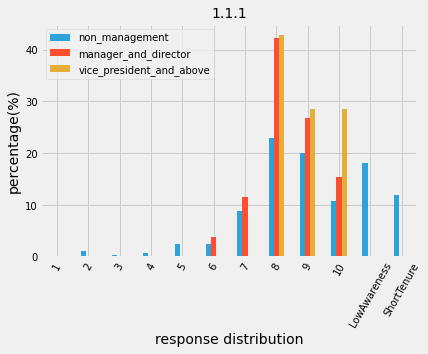

<Figure size 720x432 with 0 Axes>

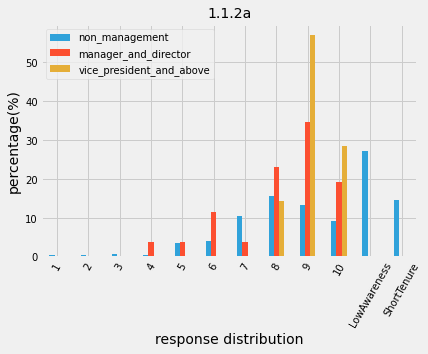

<Figure size 720x432 with 0 Axes>

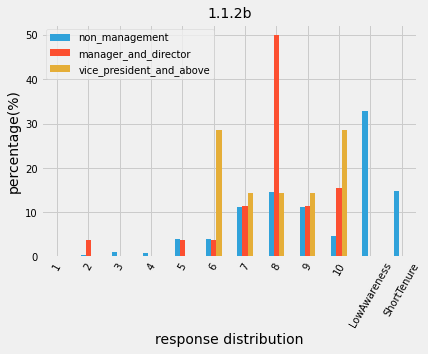

<Figure size 720x432 with 0 Axes>

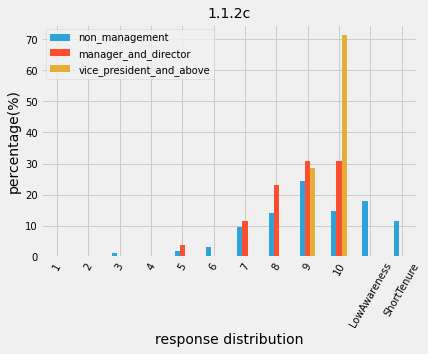

<Figure size 720x432 with 0 Axes>

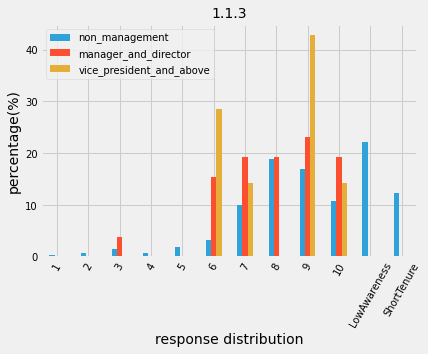

<Figure size 720x432 with 0 Axes>

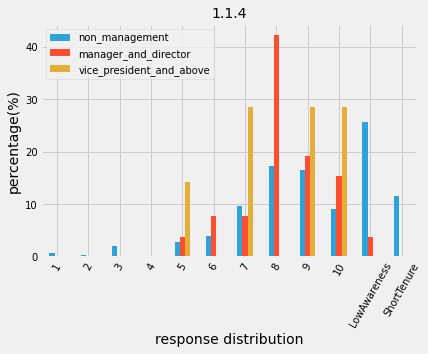

<Figure size 720x432 with 0 Axes>

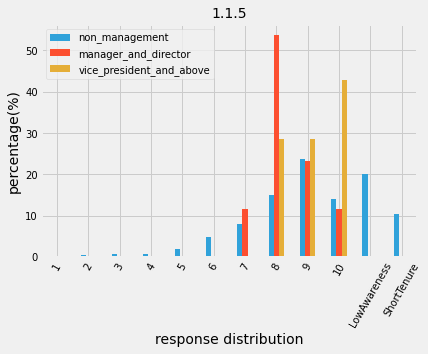

<Figure size 720x432 with 0 Axes>

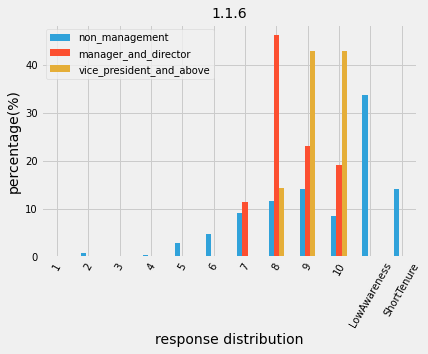

<Figure size 720x432 with 0 Axes>

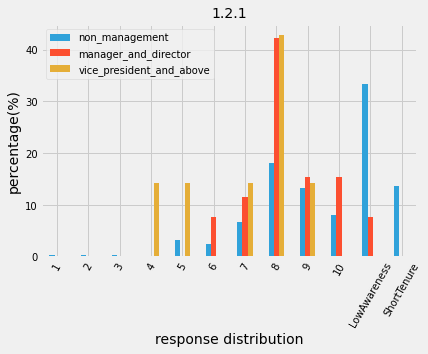

<Figure size 720x432 with 0 Axes>

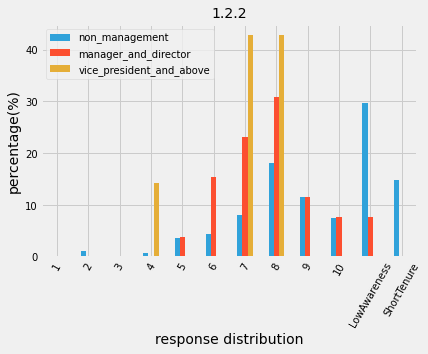

<Figure size 720x432 with 0 Axes>

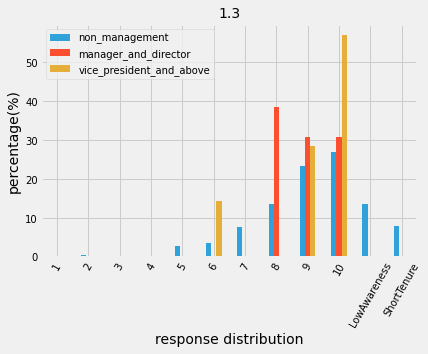

<Figure size 720x432 with 0 Axes>

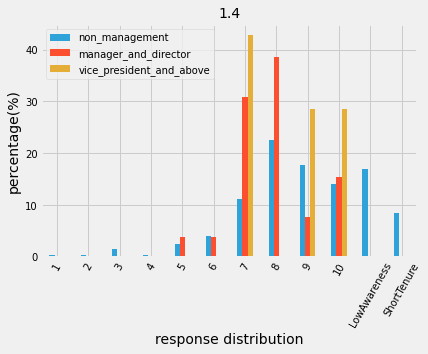

<Figure size 720x432 with 0 Axes>

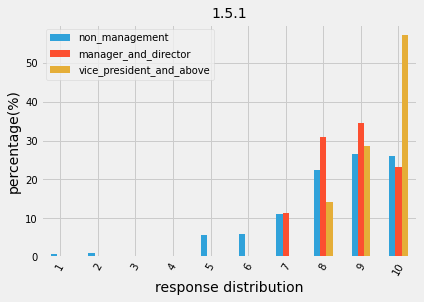

<Figure size 720x432 with 0 Axes>

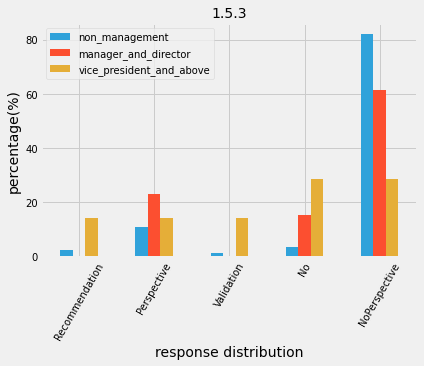

<Figure size 720x432 with 0 Axes>

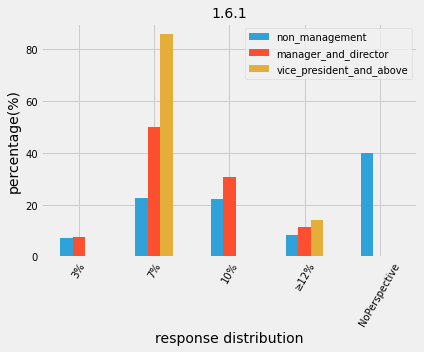

<Figure size 720x432 with 0 Axes>

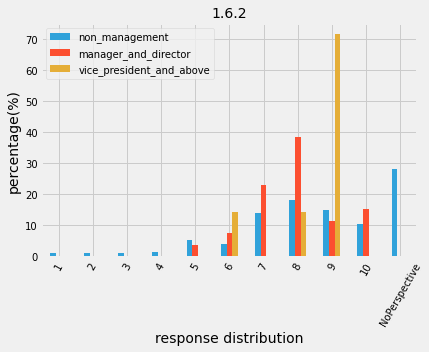

<Figure size 720x432 with 0 Axes>

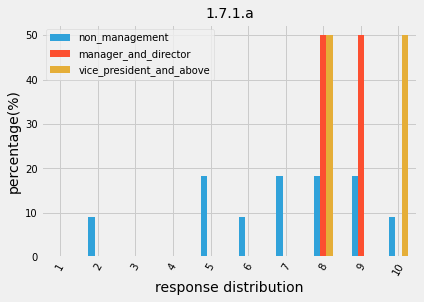

<Figure size 720x432 with 0 Axes>

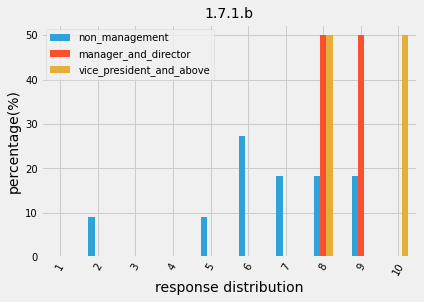

<Figure size 720x432 with 0 Axes>

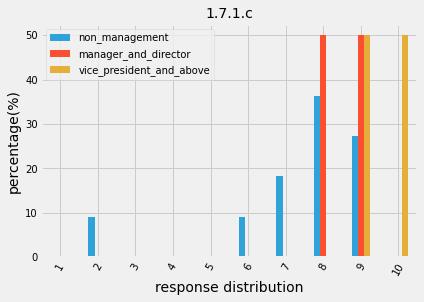

<Figure size 720x432 with 0 Axes>

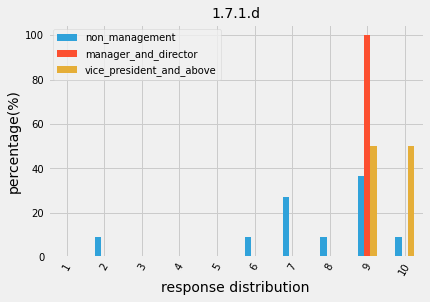

<Figure size 720x432 with 0 Axes>

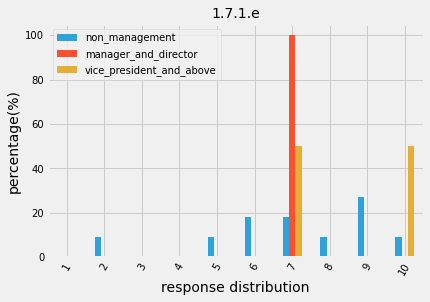

<Figure size 720x432 with 0 Axes>

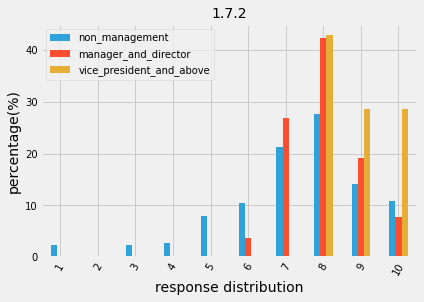

<Figure size 720x432 with 0 Axes>

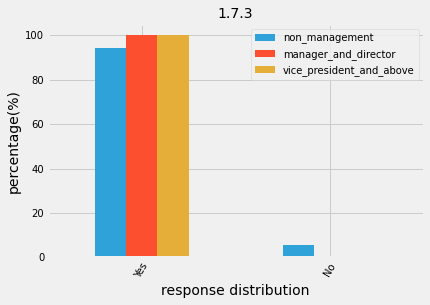

<Figure size 720x432 with 0 Axes>

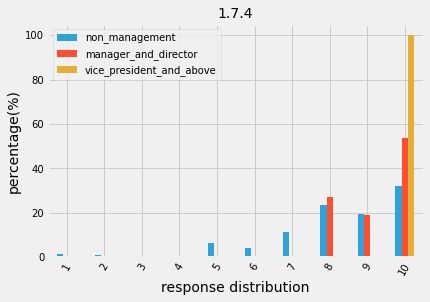

<Figure size 720x432 with 0 Axes>

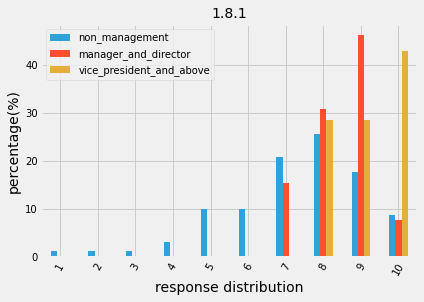

<Figure size 720x432 with 0 Axes>

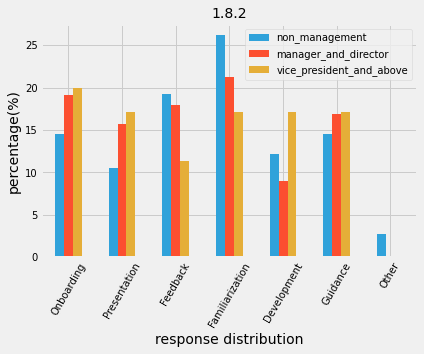

<Figure size 720x432 with 0 Axes>

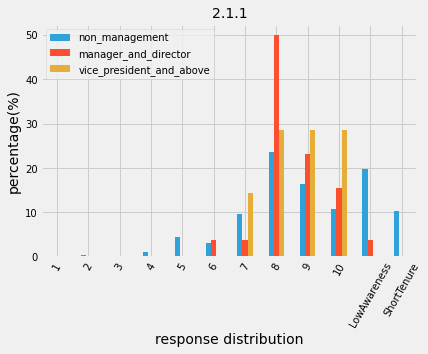

<Figure size 720x432 with 0 Axes>

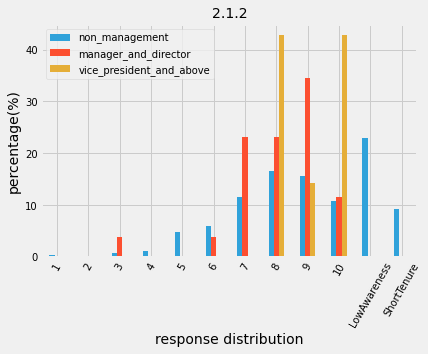

<Figure size 720x432 with 0 Axes>

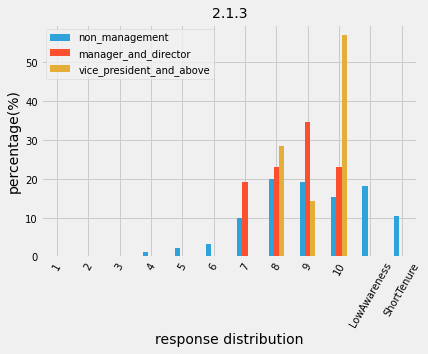

<Figure size 720x432 with 0 Axes>

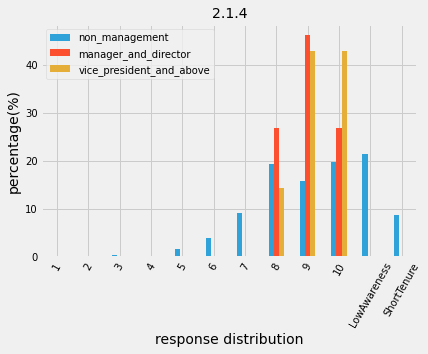

<Figure size 720x432 with 0 Axes>

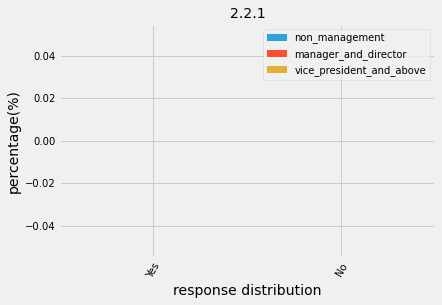

<Figure size 720x432 with 0 Axes>

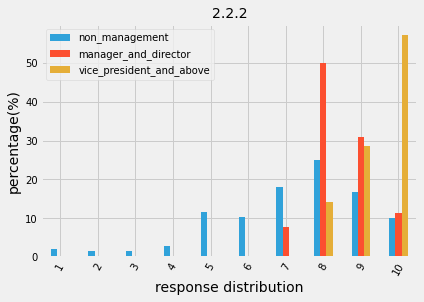

<Figure size 720x432 with 0 Axes>

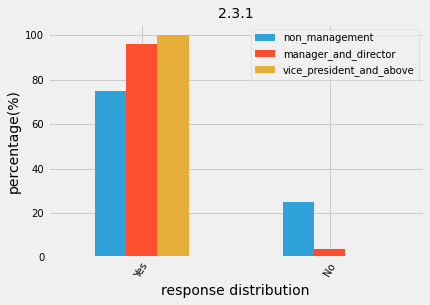

<Figure size 720x432 with 0 Axes>

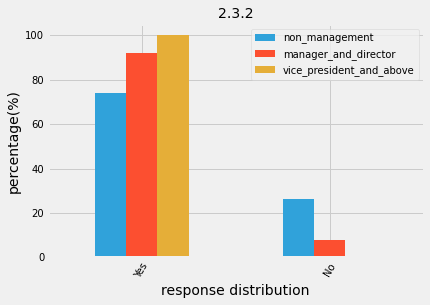

<Figure size 720x432 with 0 Axes>

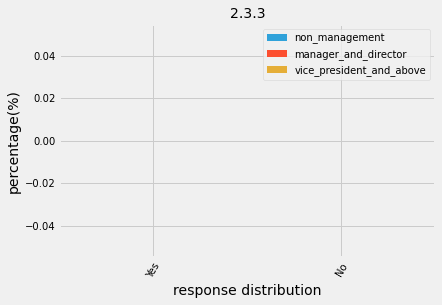

<Figure size 720x432 with 0 Axes>

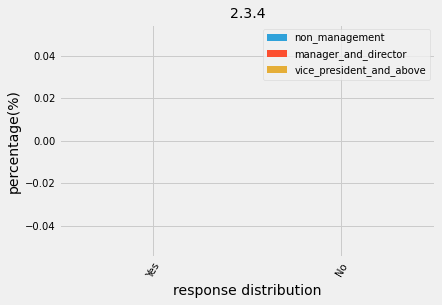

<Figure size 720x432 with 0 Axes>

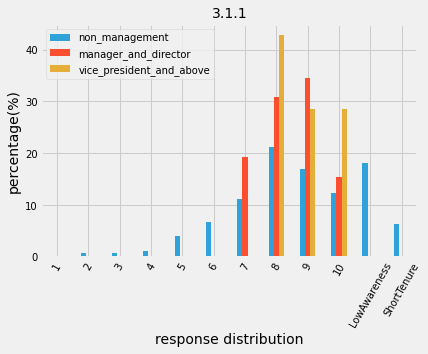

<Figure size 720x432 with 0 Axes>

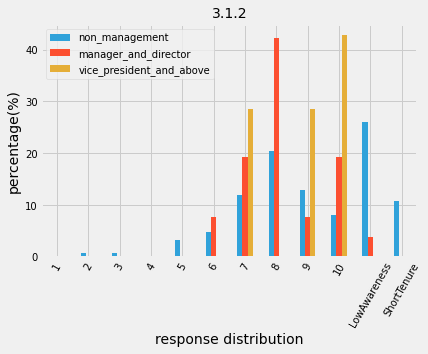

<Figure size 720x432 with 0 Axes>

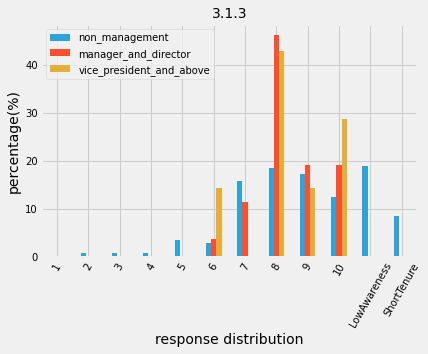

<Figure size 720x432 with 0 Axes>

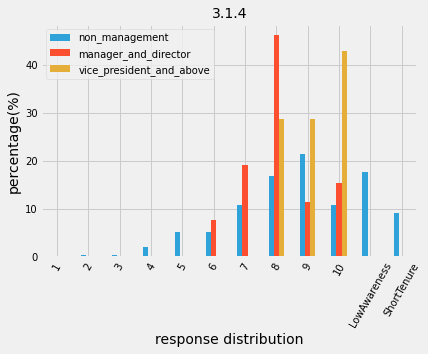

<Figure size 720x432 with 0 Axes>

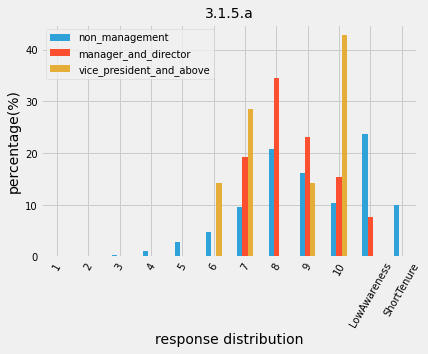

<Figure size 720x432 with 0 Axes>

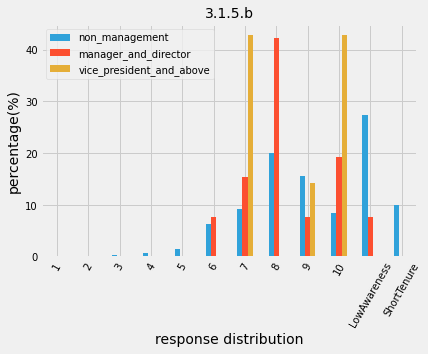

<Figure size 720x432 with 0 Axes>

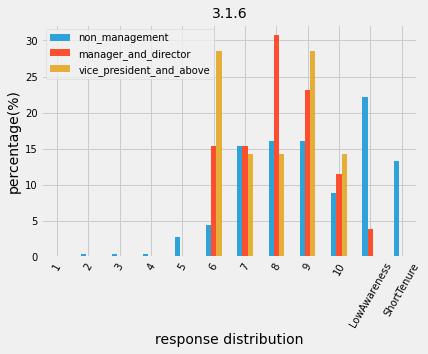

<Figure size 720x432 with 0 Axes>

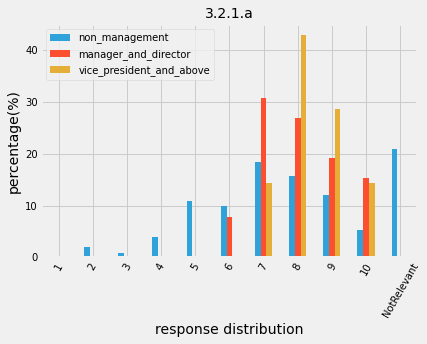

<Figure size 720x432 with 0 Axes>

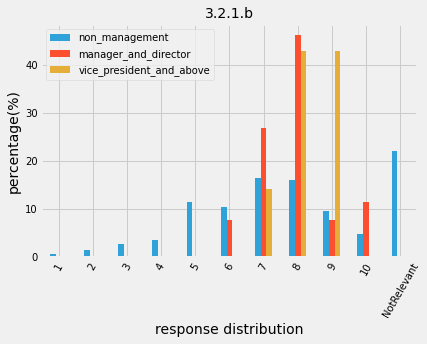

<Figure size 720x432 with 0 Axes>

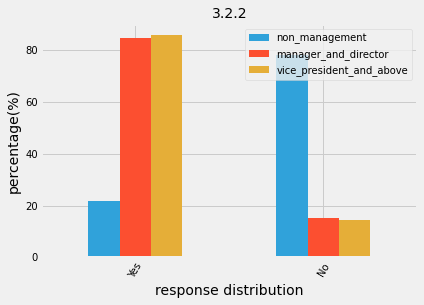

<Figure size 720x432 with 0 Axes>

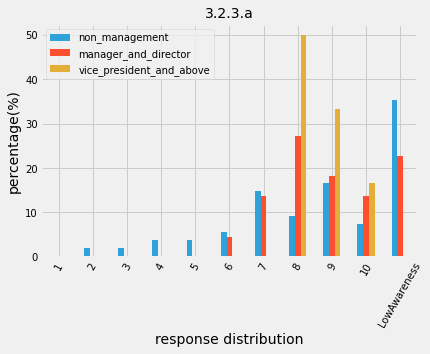

<Figure size 720x432 with 0 Axes>

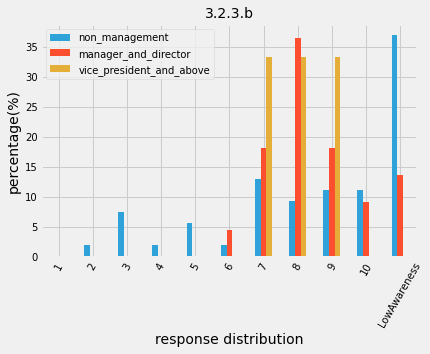

<Figure size 720x432 with 0 Axes>

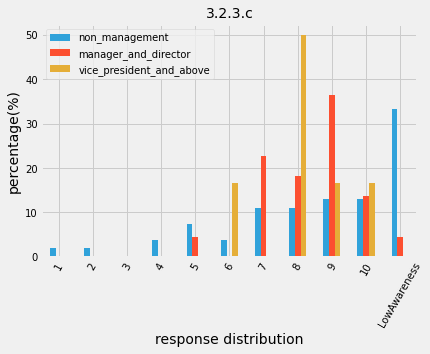

<Figure size 720x432 with 0 Axes>

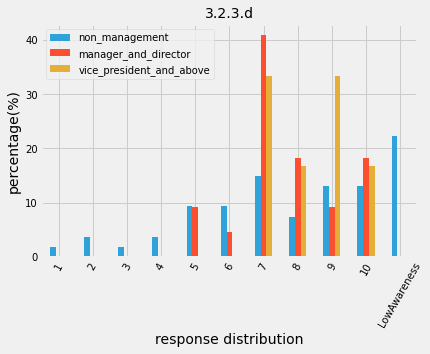

<Figure size 720x432 with 0 Axes>

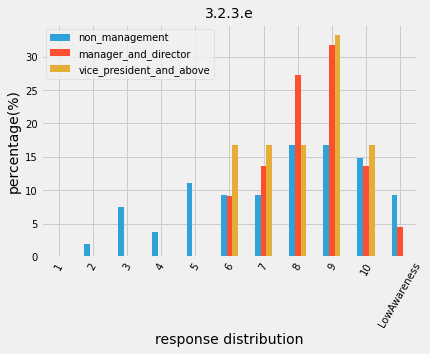

<Figure size 720x432 with 0 Axes>

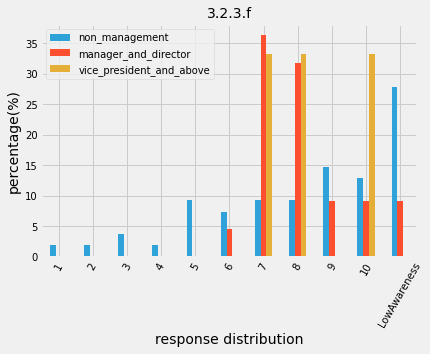

<Figure size 720x432 with 0 Axes>

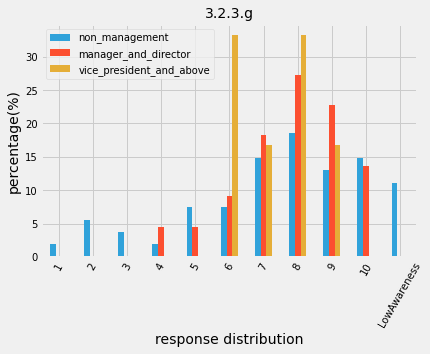

<Figure size 720x432 with 0 Axes>

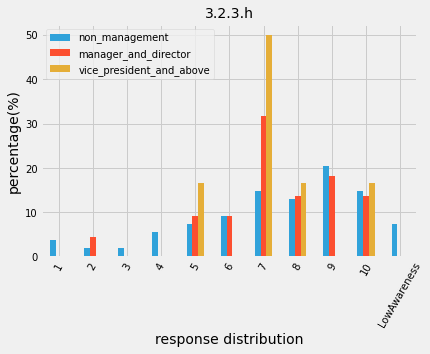

<Figure size 720x432 with 0 Axes>

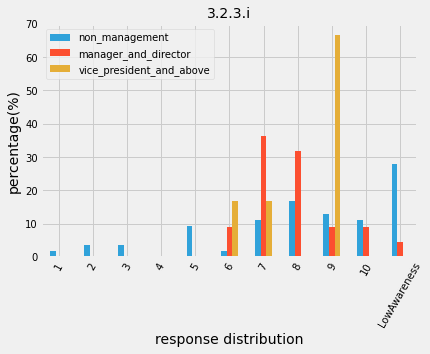

<Figure size 720x432 with 0 Axes>

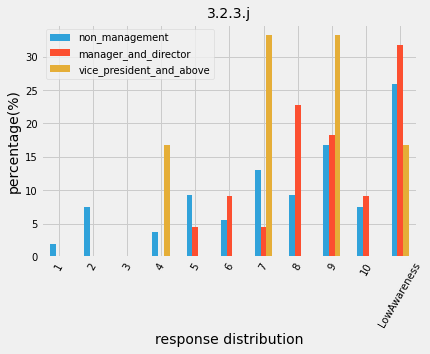

<Figure size 720x432 with 0 Axes>

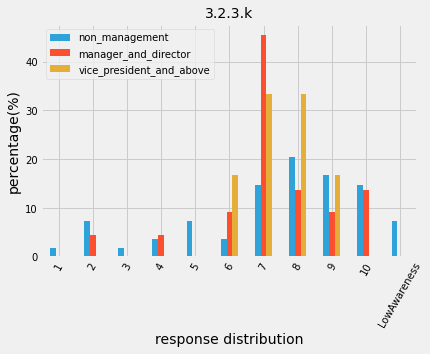

<Figure size 720x432 with 0 Axes>

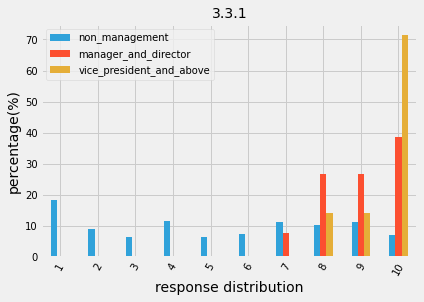

<Figure size 720x432 with 0 Axes>

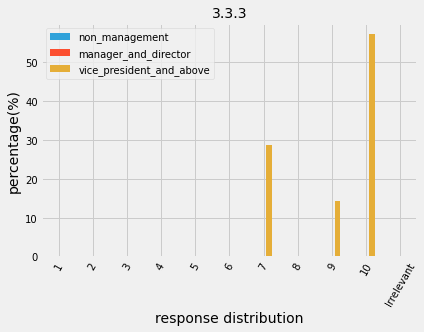

<Figure size 720x432 with 0 Axes>

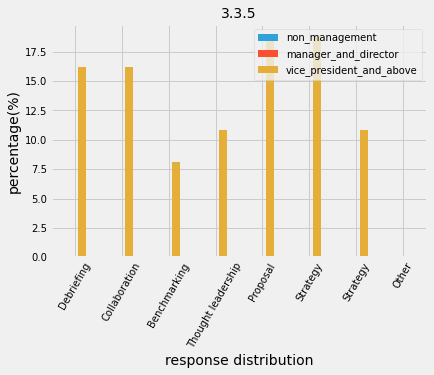

<Figure size 720x432 with 0 Axes>

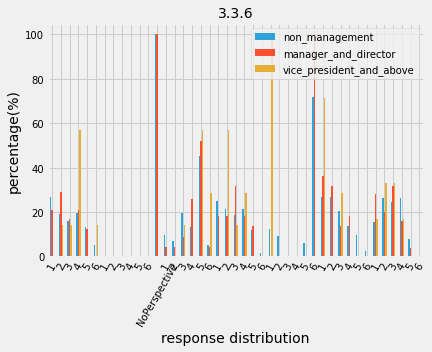

<Figure size 720x432 with 0 Axes>

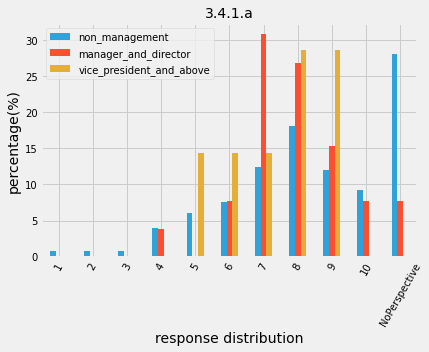

<Figure size 720x432 with 0 Axes>

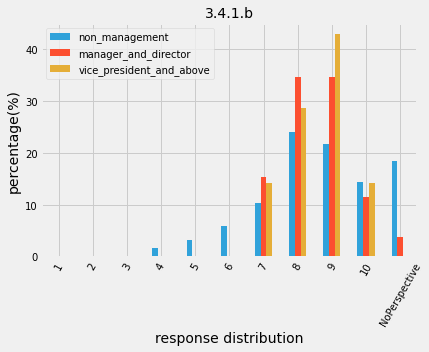

<Figure size 720x432 with 0 Axes>

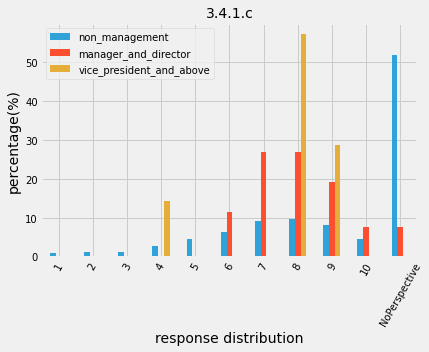

<Figure size 720x432 with 0 Axes>

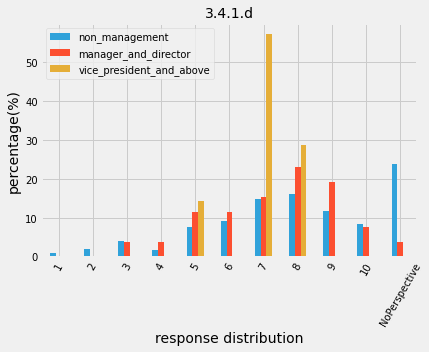

<Figure size 720x432 with 0 Axes>

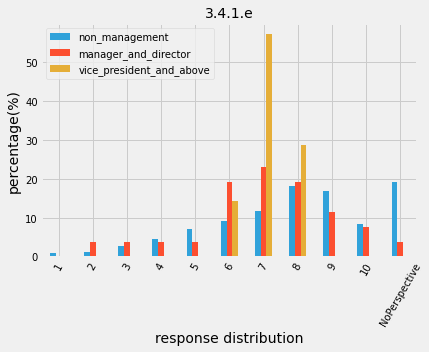

<Figure size 720x432 with 0 Axes>

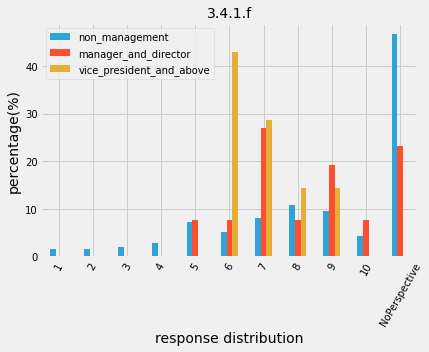

<Figure size 720x432 with 0 Axes>

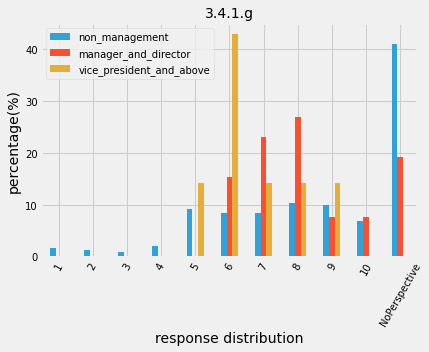

<Figure size 720x432 with 0 Axes>

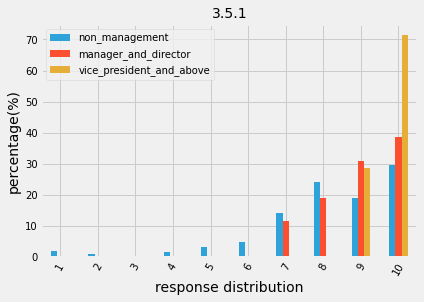

<Figure size 720x432 with 0 Axes>

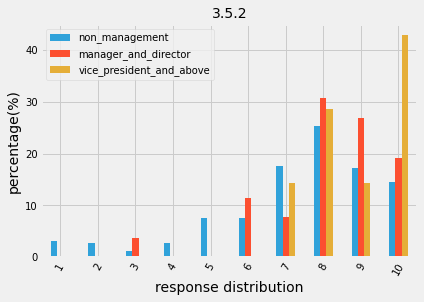

<Figure size 720x432 with 0 Axes>

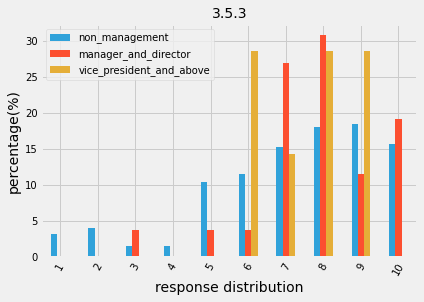

<Figure size 720x432 with 0 Axes>

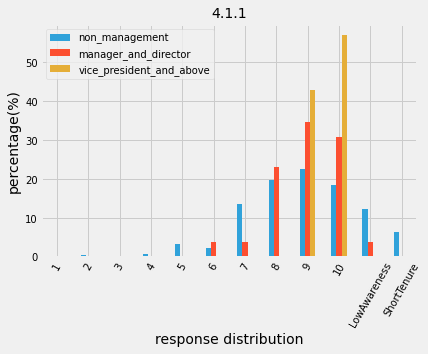

<Figure size 720x432 with 0 Axes>

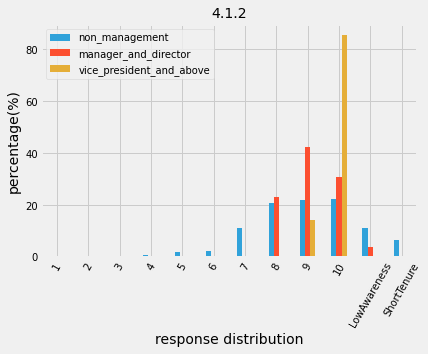

<Figure size 720x432 with 0 Axes>

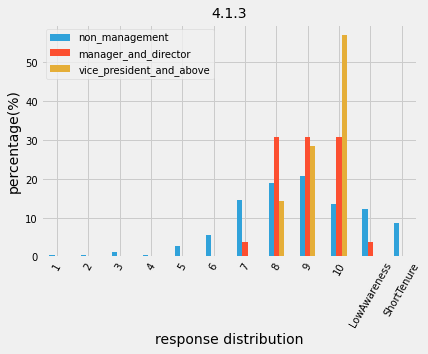

<Figure size 720x432 with 0 Axes>

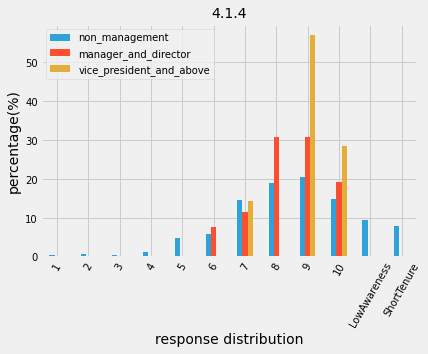

<Figure size 720x432 with 0 Axes>

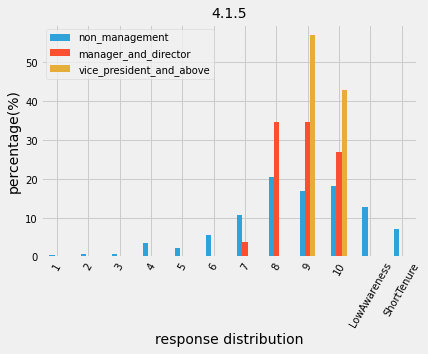

<Figure size 720x432 with 0 Axes>

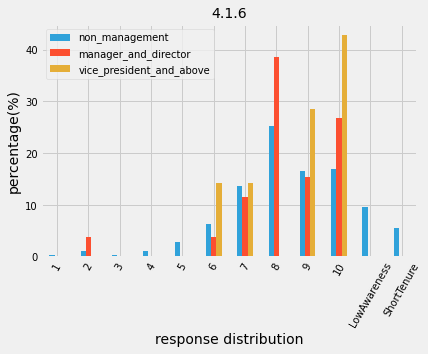

<Figure size 720x432 with 0 Axes>

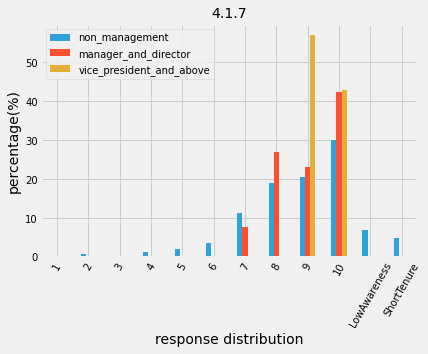

<Figure size 720x432 with 0 Axes>

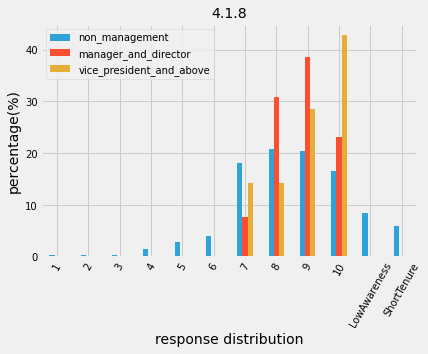

<Figure size 720x432 with 0 Axes>

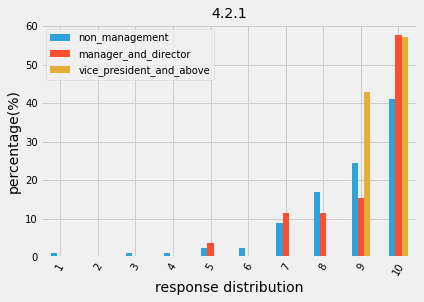

<Figure size 720x432 with 0 Axes>

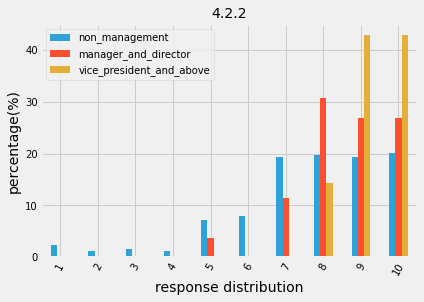

<Figure size 720x432 with 0 Axes>

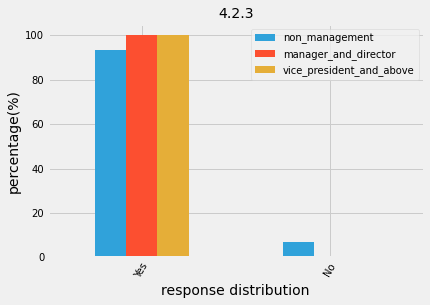

<Figure size 720x432 with 0 Axes>

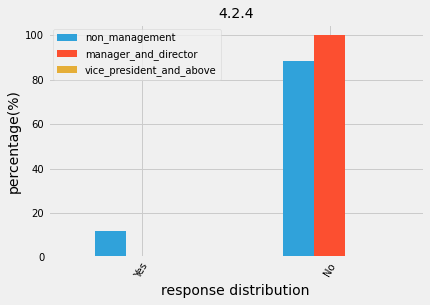

<Figure size 720x432 with 0 Axes>

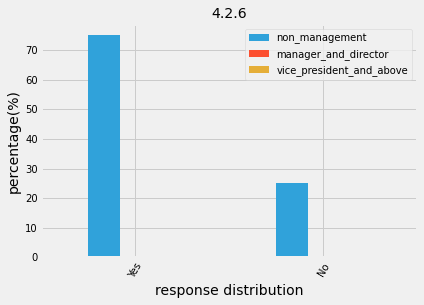

<Figure size 720x432 with 0 Axes>

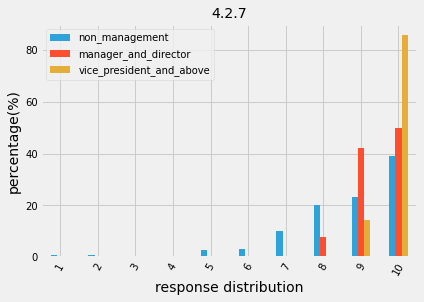

<Figure size 720x432 with 0 Axes>

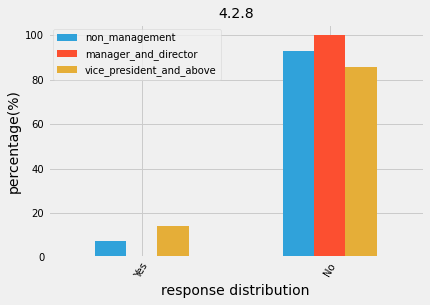

<Figure size 720x432 with 0 Axes>

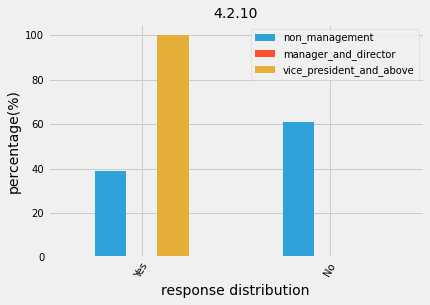

<Figure size 720x432 with 0 Axes>

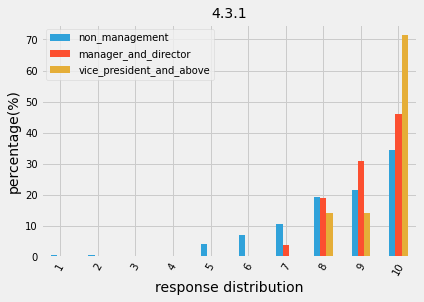

<Figure size 720x432 with 0 Axes>

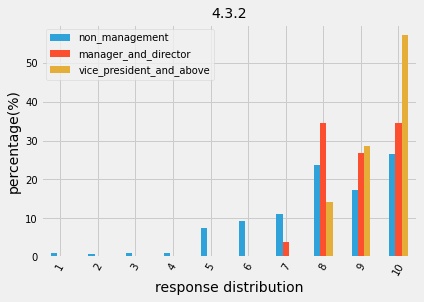

<Figure size 720x432 with 0 Axes>

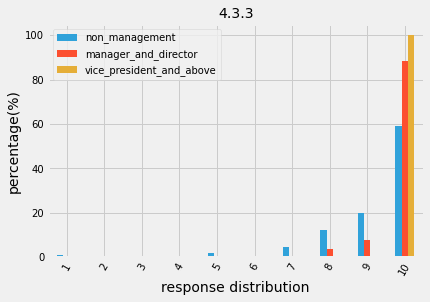

<Figure size 720x432 with 0 Axes>

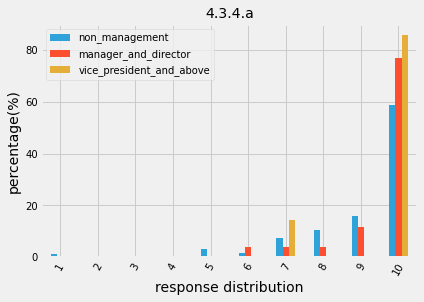

<Figure size 720x432 with 0 Axes>

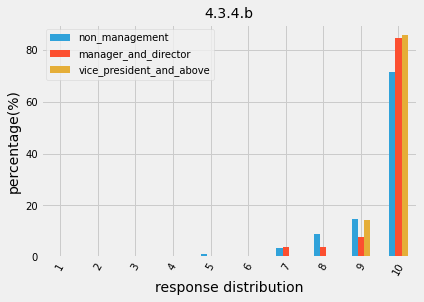

<Figure size 720x432 with 0 Axes>

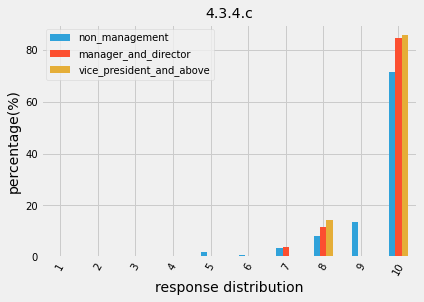

<Figure size 720x432 with 0 Axes>

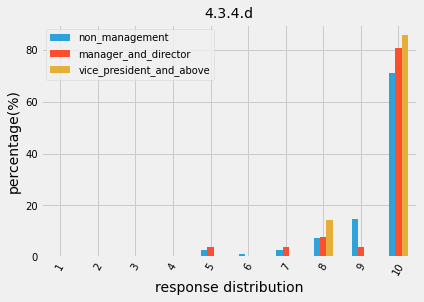

<Figure size 720x432 with 0 Axes>

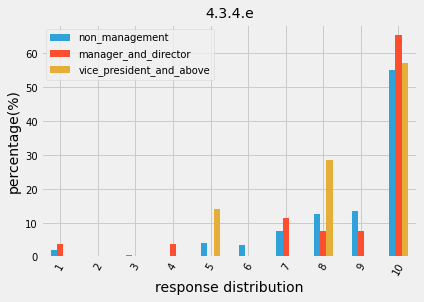

<Figure size 720x432 with 0 Axes>

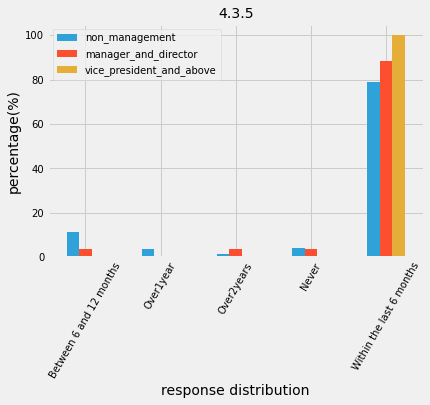

<Figure size 720x432 with 0 Axes>

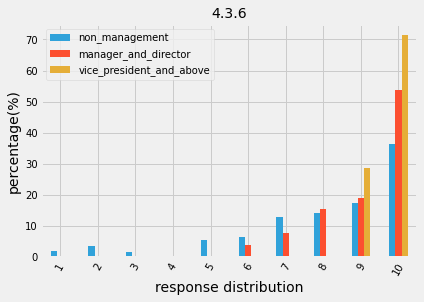

<Figure size 720x432 with 0 Axes>

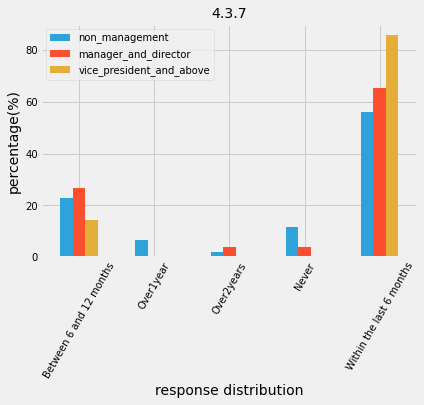

<Figure size 720x432 with 0 Axes>

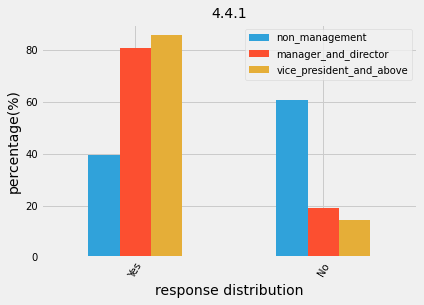

<Figure size 720x432 with 0 Axes>

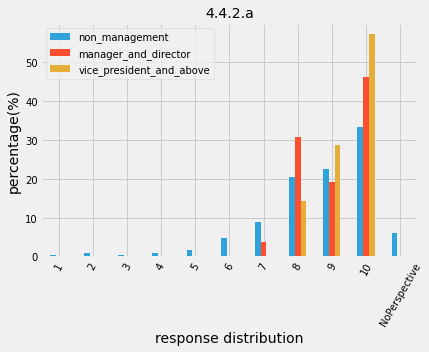

<Figure size 720x432 with 0 Axes>

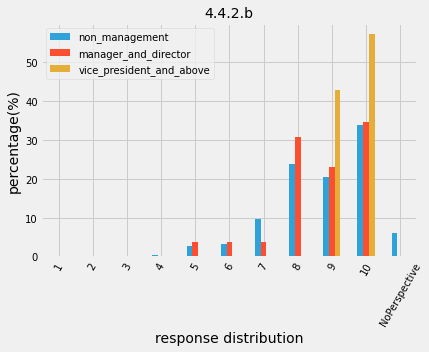

<Figure size 720x432 with 0 Axes>

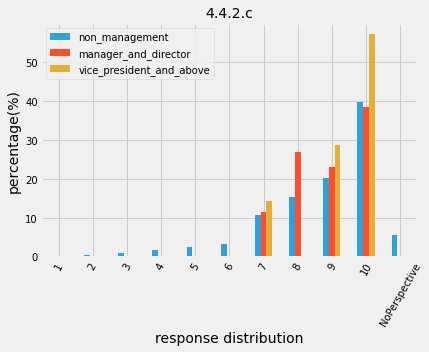

<Figure size 720x432 with 0 Axes>

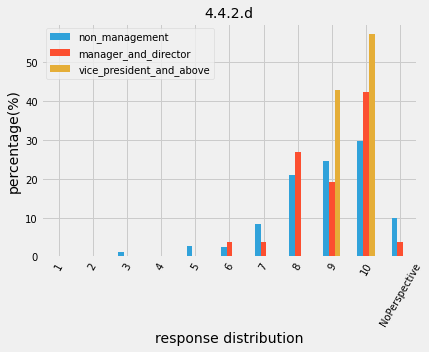

<Figure size 720x432 with 0 Axes>

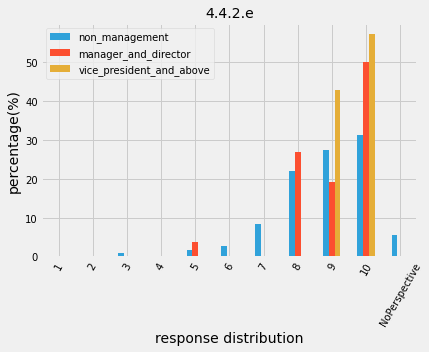

<Figure size 720x432 with 0 Axes>

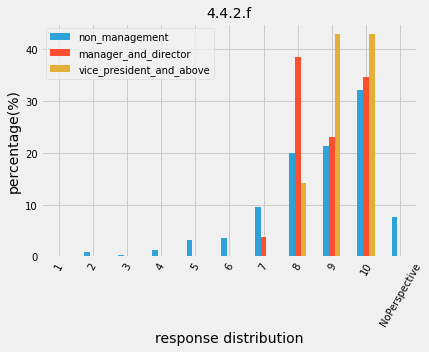

<Figure size 720x432 with 0 Axes>

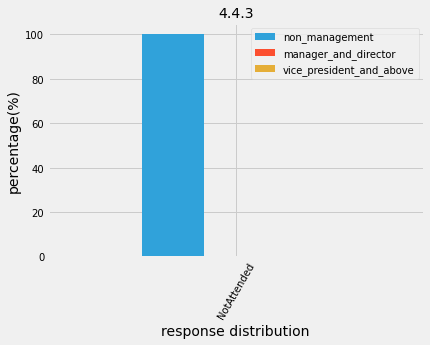

<Figure size 720x432 with 0 Axes>

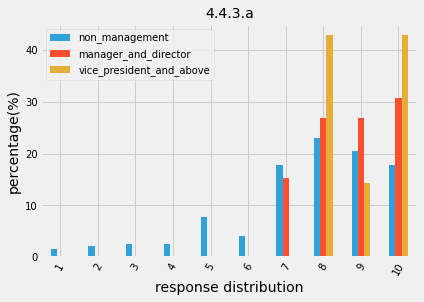

<Figure size 720x432 with 0 Axes>

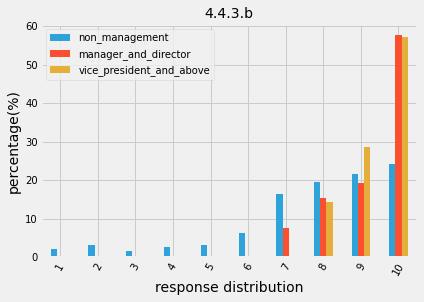

<Figure size 720x432 with 0 Axes>

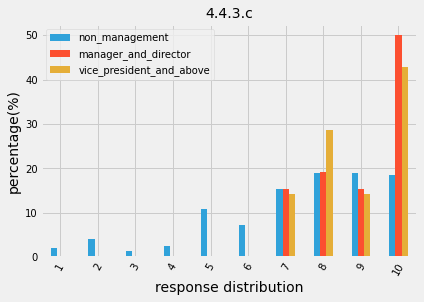

<Figure size 720x432 with 0 Axes>

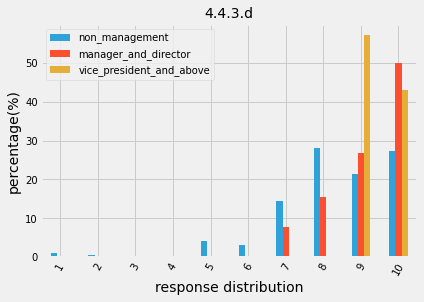

<Figure size 720x432 with 0 Axes>

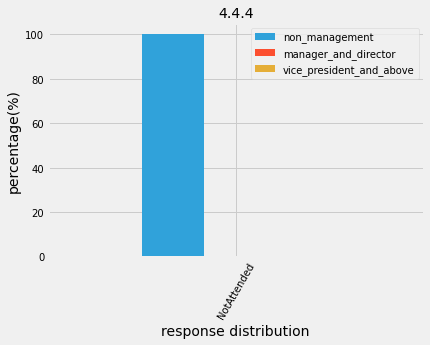

<Figure size 720x432 with 0 Axes>

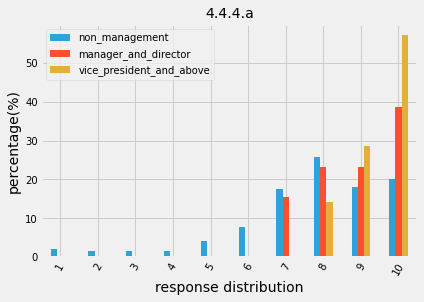

<Figure size 720x432 with 0 Axes>

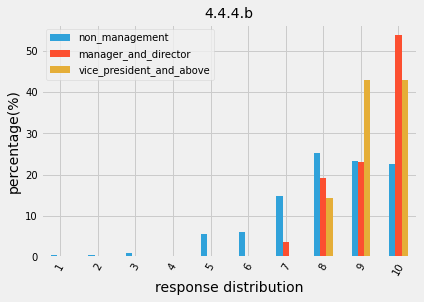

<Figure size 720x432 with 0 Axes>

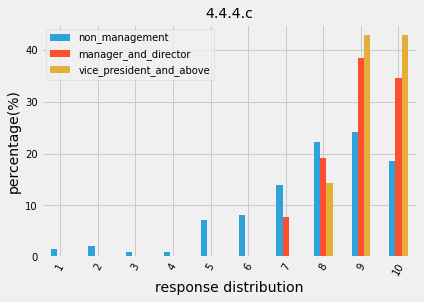

<Figure size 720x432 with 0 Axes>

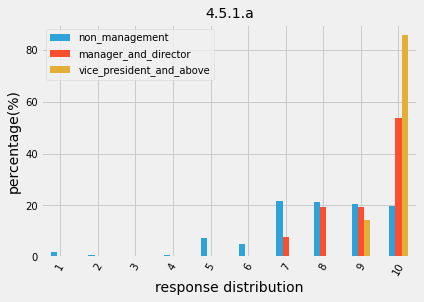

<Figure size 720x432 with 0 Axes>

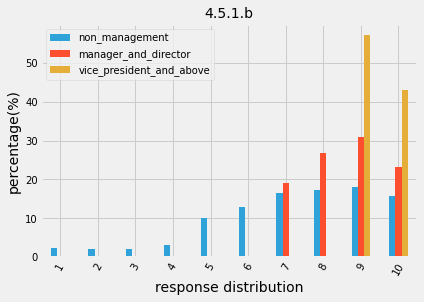

<Figure size 720x432 with 0 Axes>

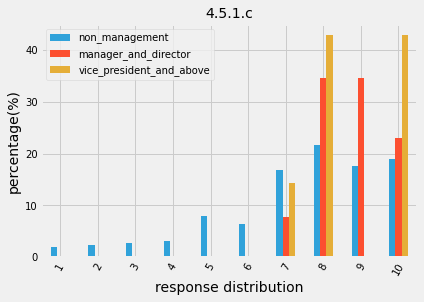

<Figure size 720x432 with 0 Axes>

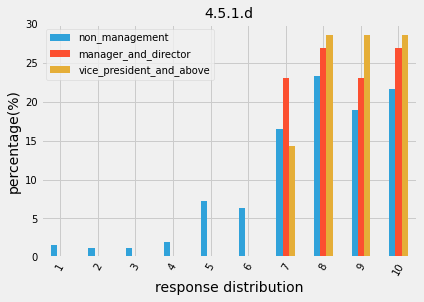

<Figure size 720x432 with 0 Axes>

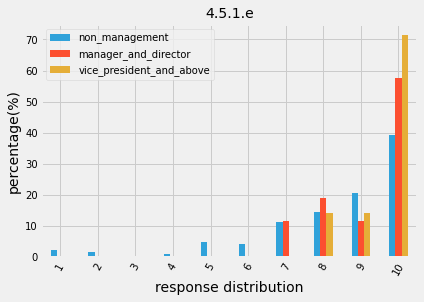

<Figure size 720x432 with 0 Axes>

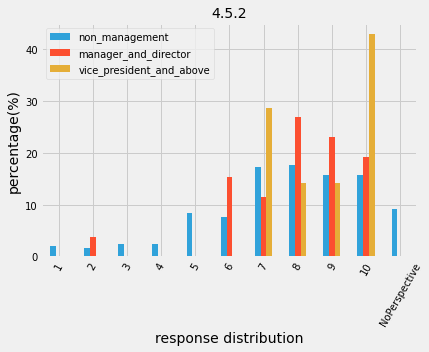

<Figure size 720x432 with 0 Axes>

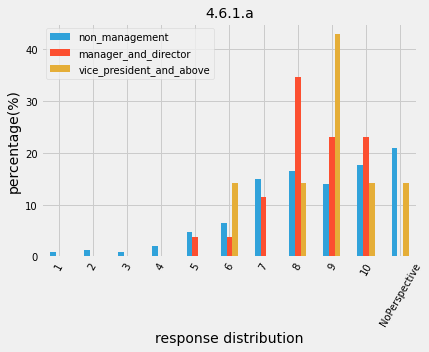

<Figure size 720x432 with 0 Axes>

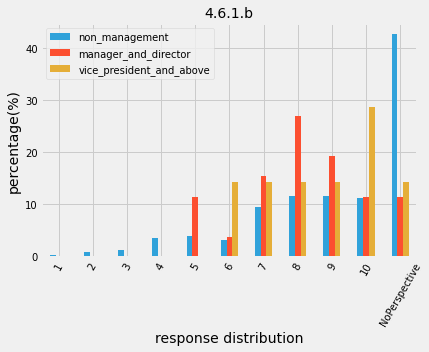

<Figure size 720x432 with 0 Axes>

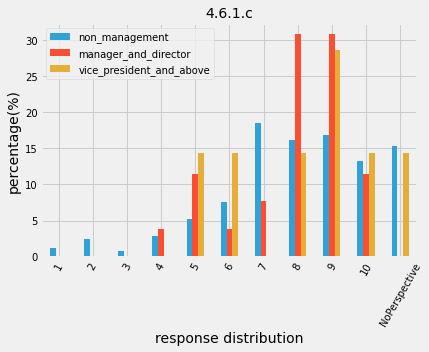

<Figure size 720x432 with 0 Axes>

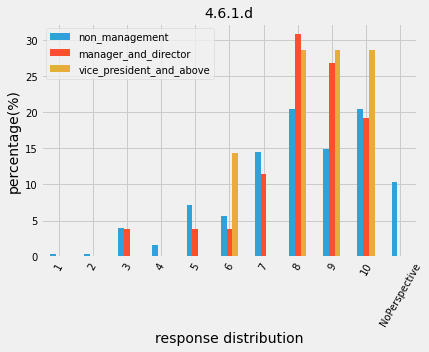

<Figure size 720x432 with 0 Axes>

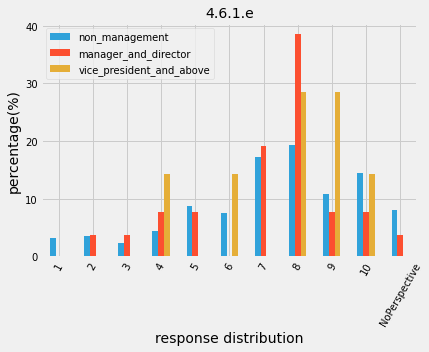

<Figure size 720x432 with 0 Axes>

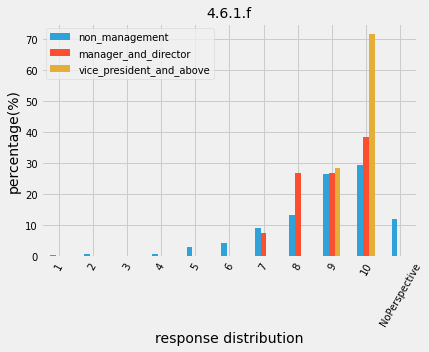

<Figure size 720x432 with 0 Axes>

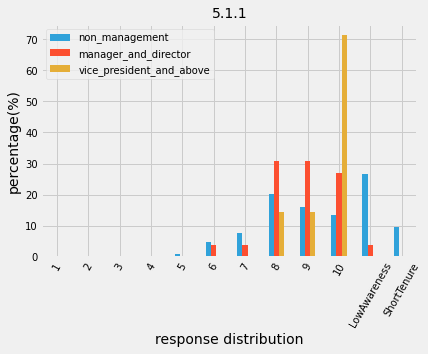

<Figure size 720x432 with 0 Axes>

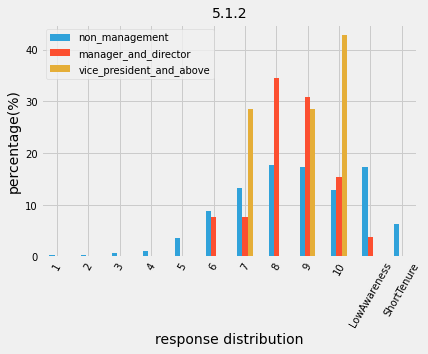

<Figure size 720x432 with 0 Axes>

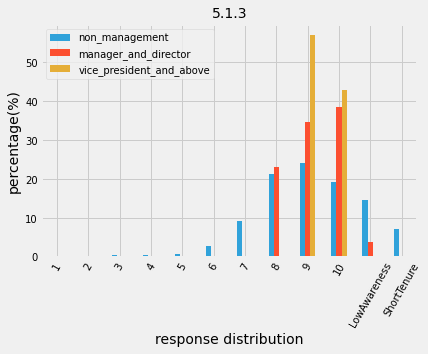

<Figure size 720x432 with 0 Axes>

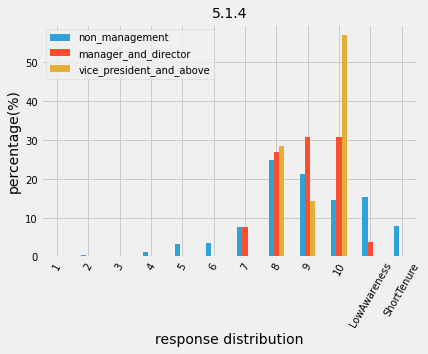

<Figure size 720x432 with 0 Axes>

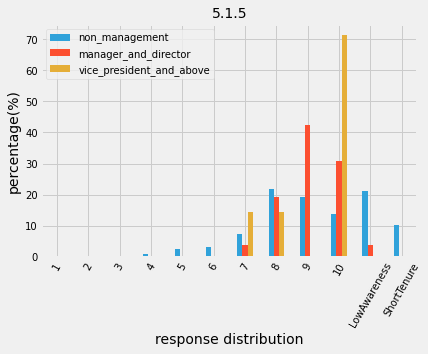

<Figure size 720x432 with 0 Axes>

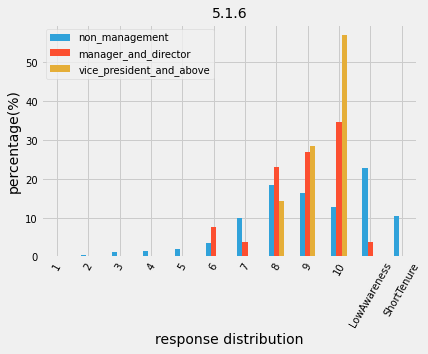

<Figure size 720x432 with 0 Axes>

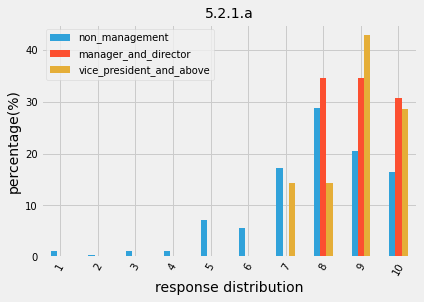

<Figure size 720x432 with 0 Axes>

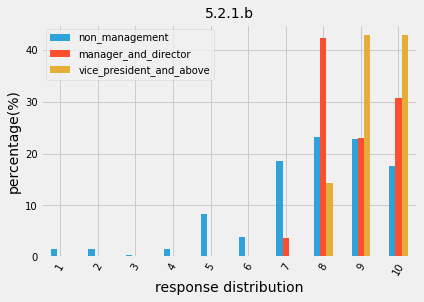

<Figure size 720x432 with 0 Axes>

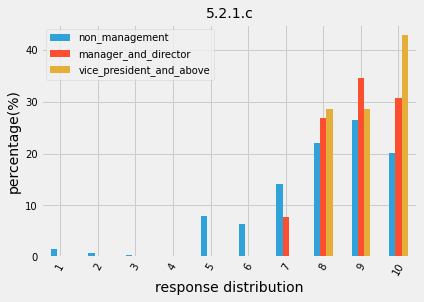

<Figure size 720x432 with 0 Axes>

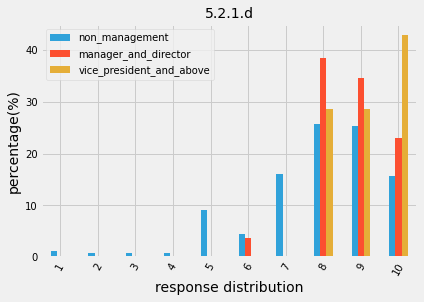

<Figure size 720x432 with 0 Axes>

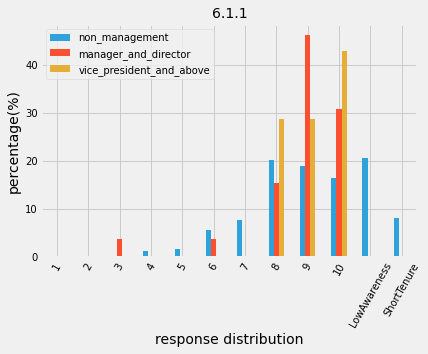

<Figure size 720x432 with 0 Axes>

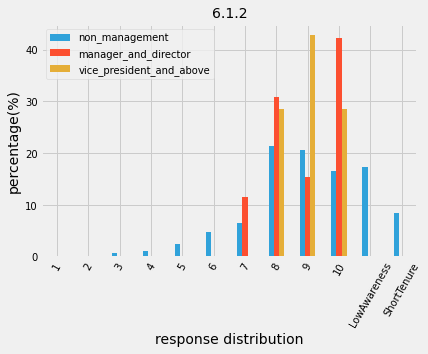

<Figure size 720x432 with 0 Axes>

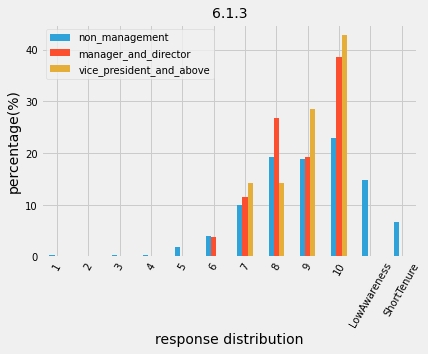

<Figure size 720x432 with 0 Axes>

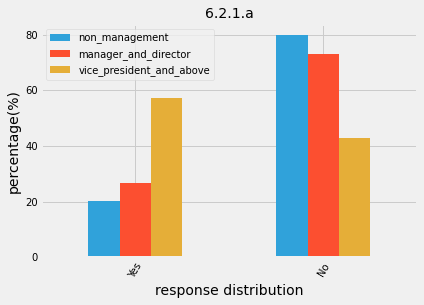

<Figure size 720x432 with 0 Axes>

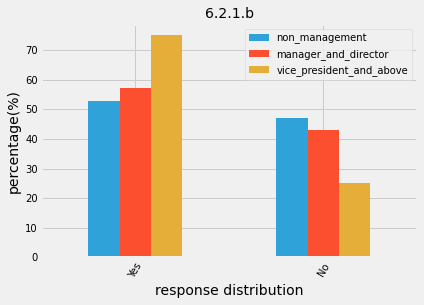

<Figure size 720x432 with 0 Axes>

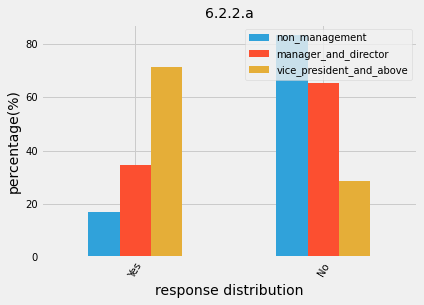

<Figure size 720x432 with 0 Axes>

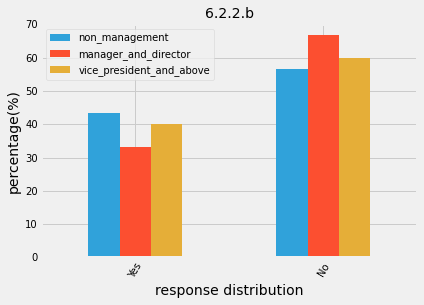

<Figure size 720x432 with 0 Axes>

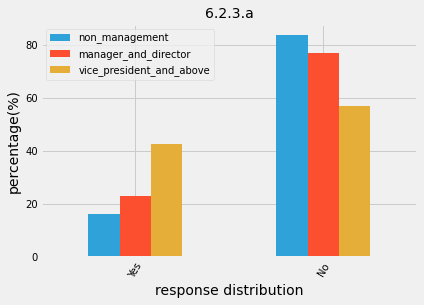

<Figure size 720x432 with 0 Axes>

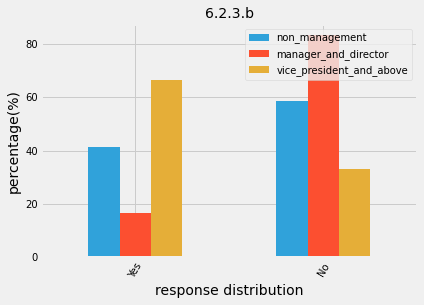

<Figure size 720x432 with 0 Axes>

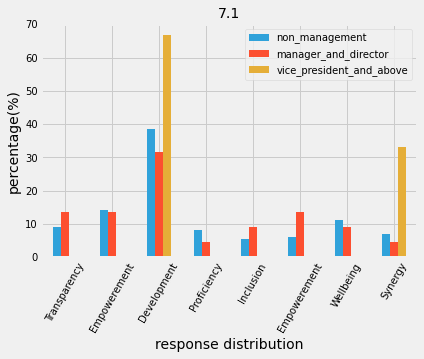

<Figure size 720x432 with 0 Axes>

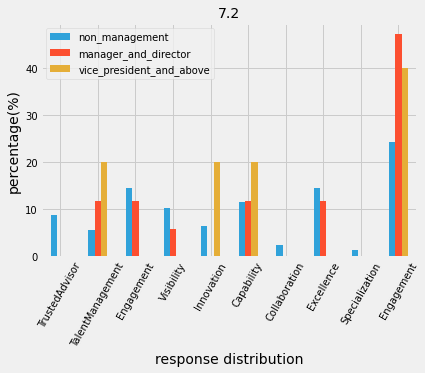

<Figure size 720x432 with 0 Axes>

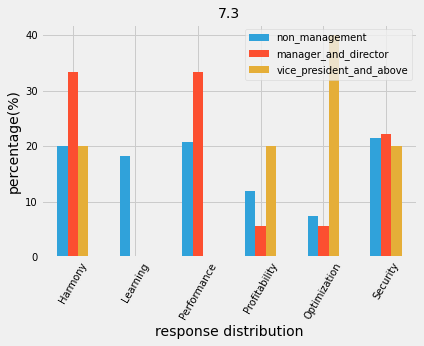

<Figure size 720x432 with 0 Axes>

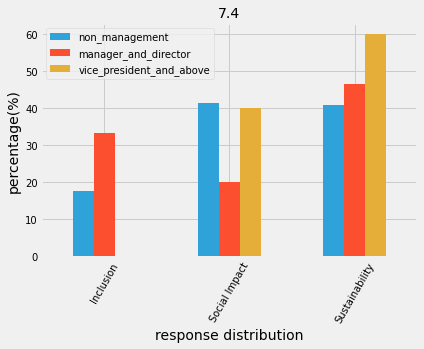

<Figure size 720x432 with 0 Axes>

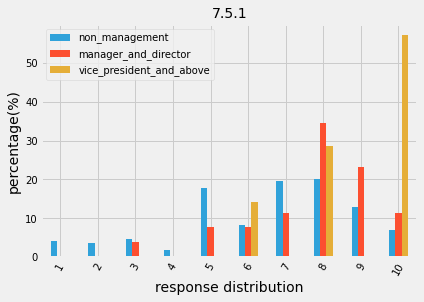

In [42]:
for i in range(len(master_df)):
    plot_barcharts(master_df[i])

In [181]:
sec_master_df=processing_visualisation(df_sec,sec_counter_list)

C:\Users\shuqing.ke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
C:\Users\shuqing.ke\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 720x432 with 0 Axes>

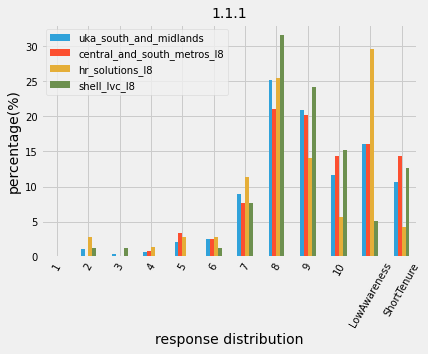

<Figure size 720x432 with 0 Axes>

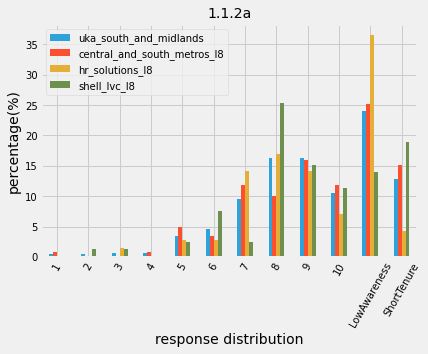

<Figure size 720x432 with 0 Axes>

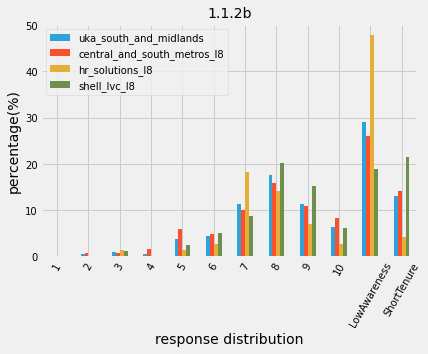

<Figure size 720x432 with 0 Axes>

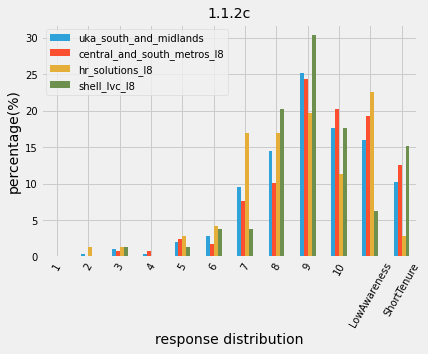

<Figure size 720x432 with 0 Axes>

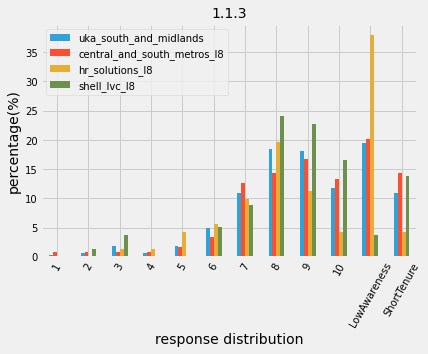

<Figure size 720x432 with 0 Axes>

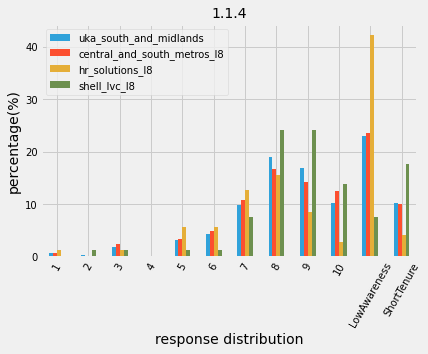

<Figure size 720x432 with 0 Axes>

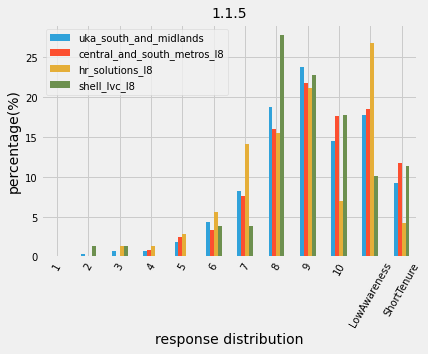

<Figure size 720x432 with 0 Axes>

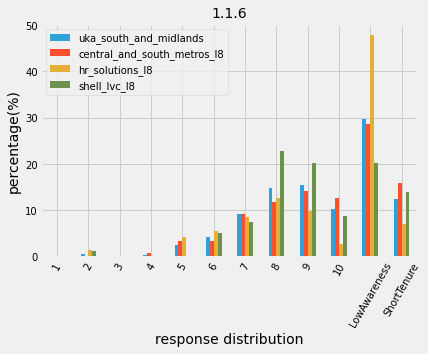

<Figure size 720x432 with 0 Axes>

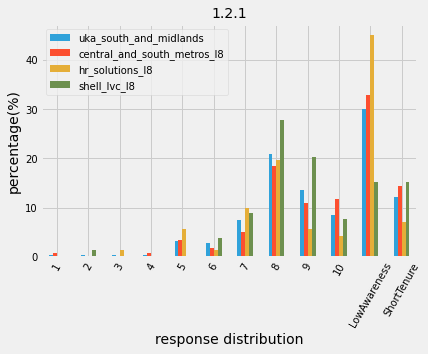

<Figure size 720x432 with 0 Axes>

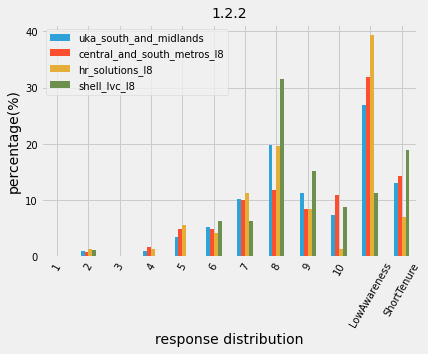

<Figure size 720x432 with 0 Axes>

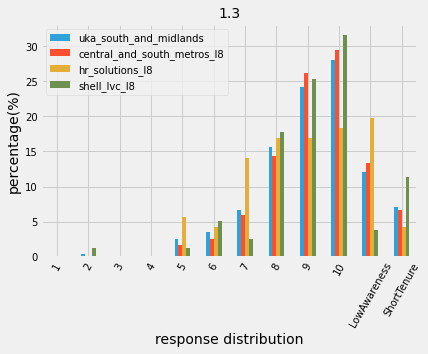

<Figure size 720x432 with 0 Axes>

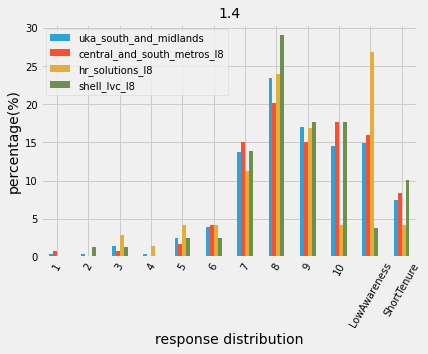

<Figure size 720x432 with 0 Axes>

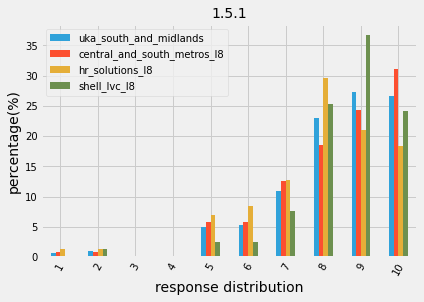

<Figure size 720x432 with 0 Axes>

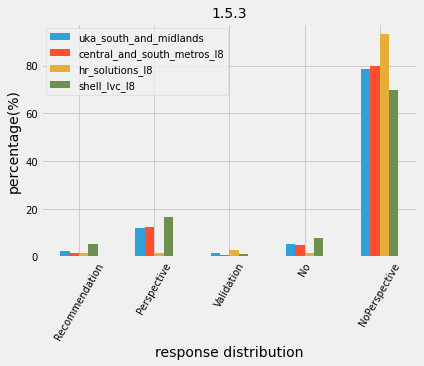

<Figure size 720x432 with 0 Axes>

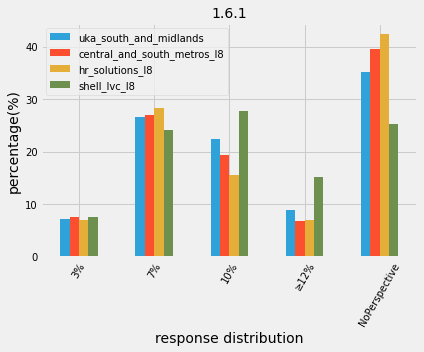

<Figure size 720x432 with 0 Axes>

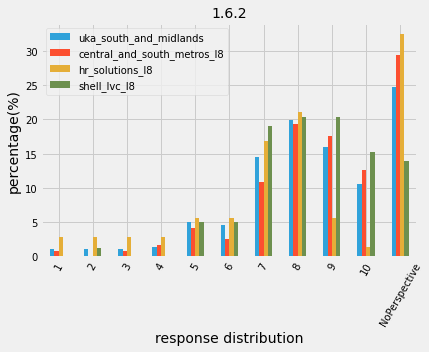

<Figure size 720x432 with 0 Axes>

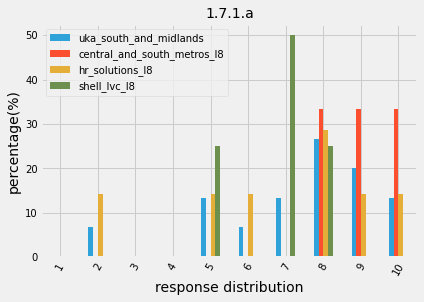

<Figure size 720x432 with 0 Axes>

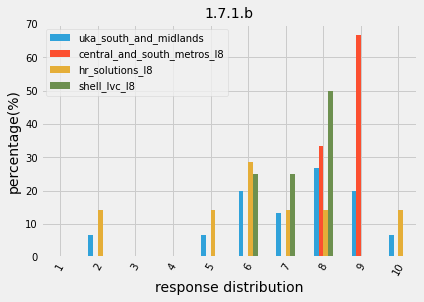

<Figure size 720x432 with 0 Axes>

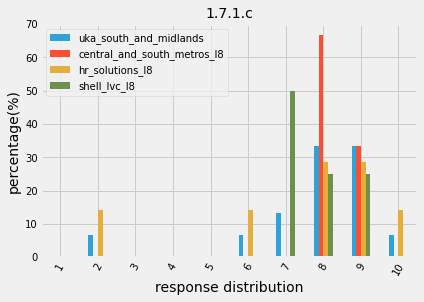

<Figure size 720x432 with 0 Axes>

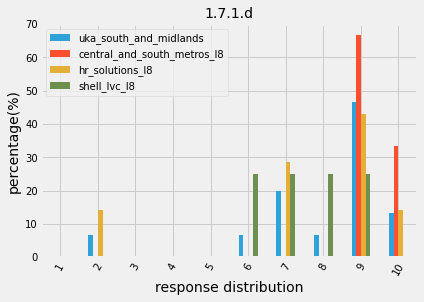

<Figure size 720x432 with 0 Axes>

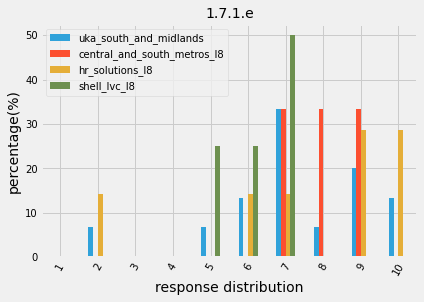

<Figure size 720x432 with 0 Axes>

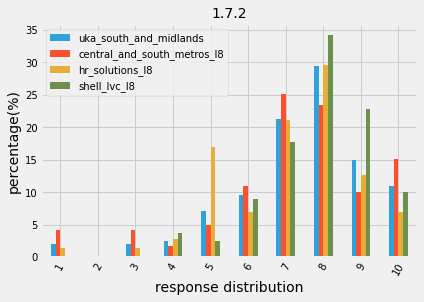

<Figure size 720x432 with 0 Axes>

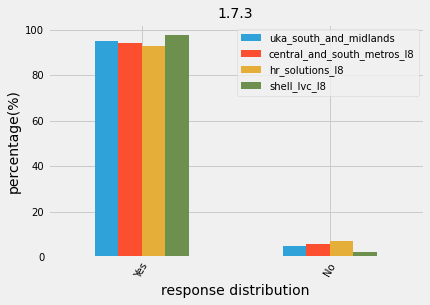

<Figure size 720x432 with 0 Axes>

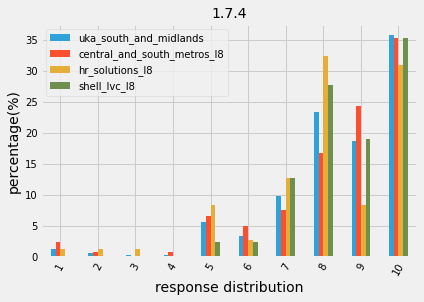

<Figure size 720x432 with 0 Axes>

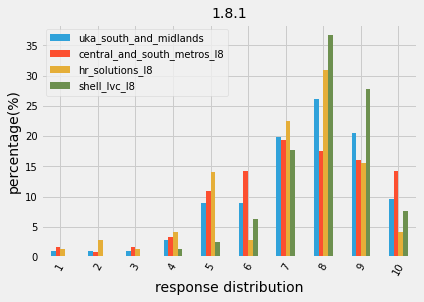

<Figure size 720x432 with 0 Axes>

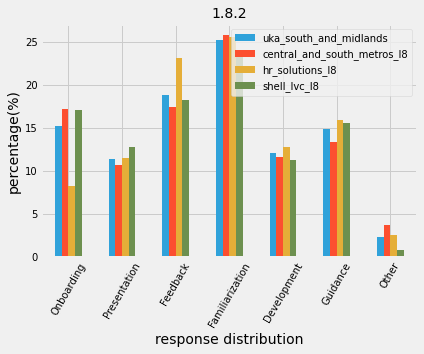

<Figure size 720x432 with 0 Axes>

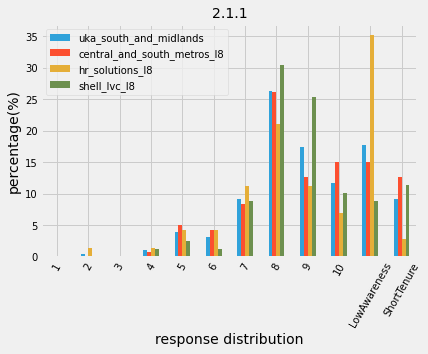

<Figure size 720x432 with 0 Axes>

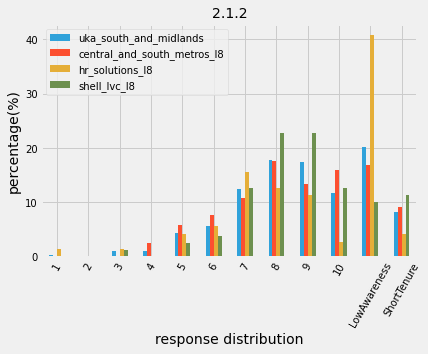

<Figure size 720x432 with 0 Axes>

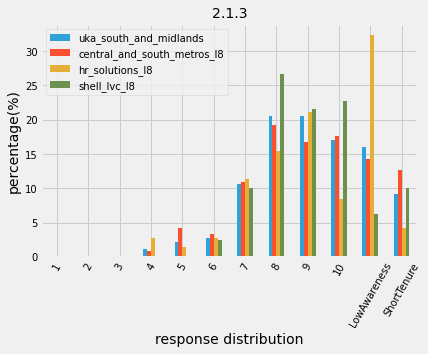

<Figure size 720x432 with 0 Axes>

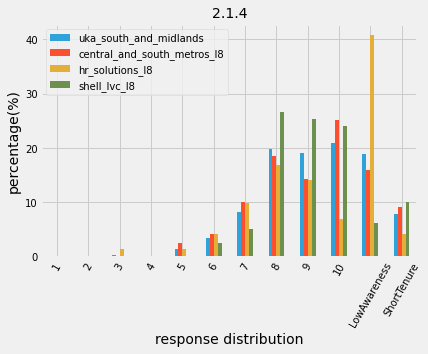

<Figure size 720x432 with 0 Axes>

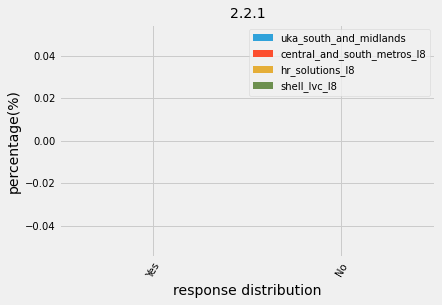

<Figure size 720x432 with 0 Axes>

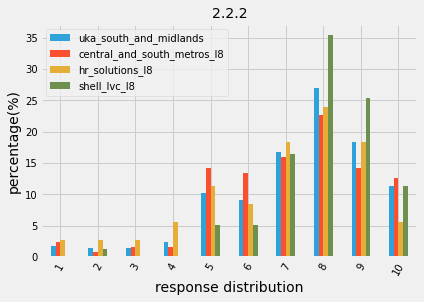

<Figure size 720x432 with 0 Axes>

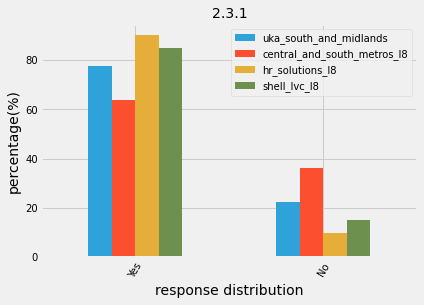

<Figure size 720x432 with 0 Axes>

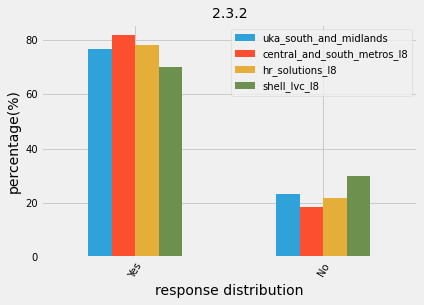

<Figure size 720x432 with 0 Axes>

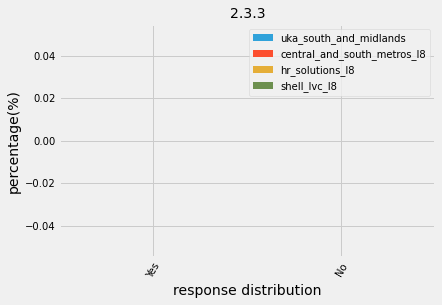

<Figure size 720x432 with 0 Axes>

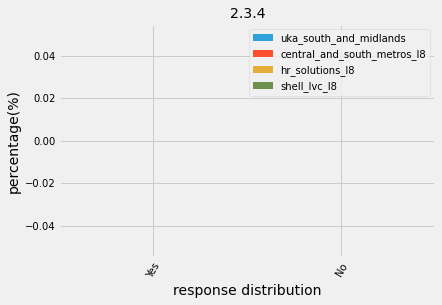

<Figure size 720x432 with 0 Axes>

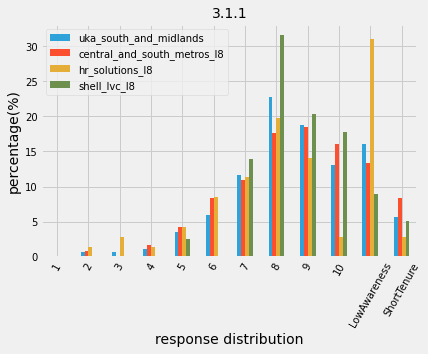

<Figure size 720x432 with 0 Axes>

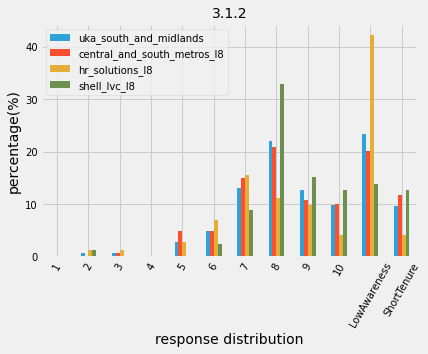

<Figure size 720x432 with 0 Axes>

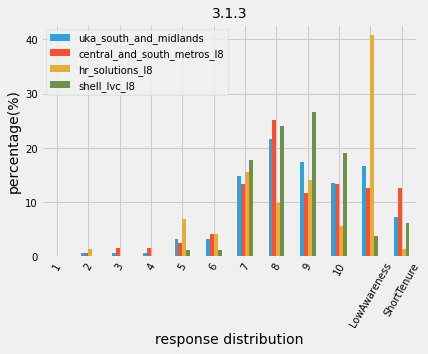

<Figure size 720x432 with 0 Axes>

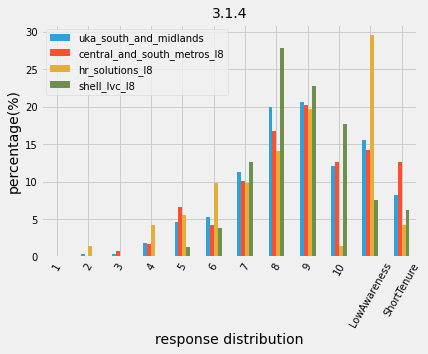

<Figure size 720x432 with 0 Axes>

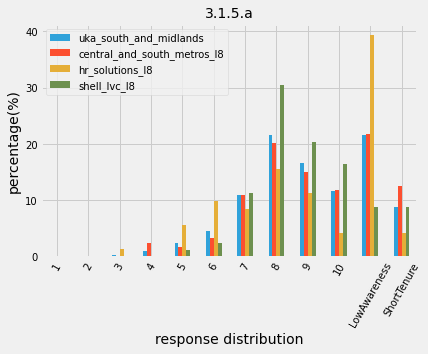

<Figure size 720x432 with 0 Axes>

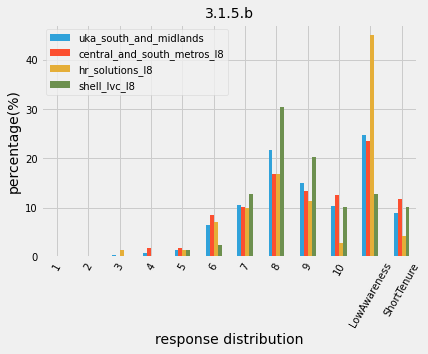

<Figure size 720x432 with 0 Axes>

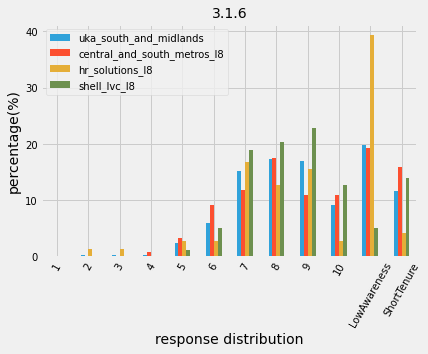

<Figure size 720x432 with 0 Axes>

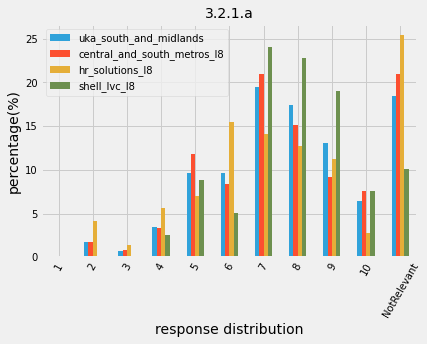

<Figure size 720x432 with 0 Axes>

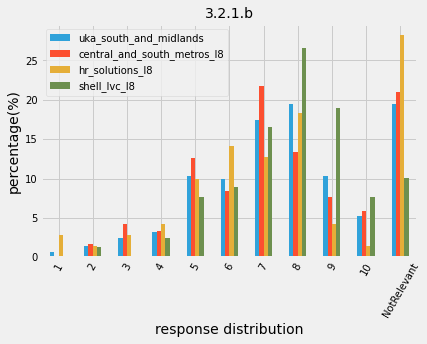

<Figure size 720x432 with 0 Axes>

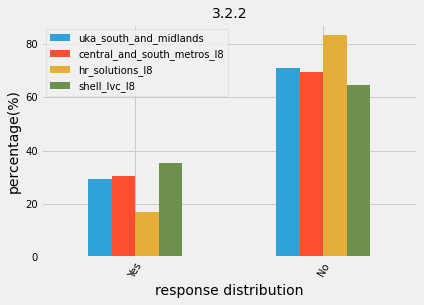

<Figure size 720x432 with 0 Axes>

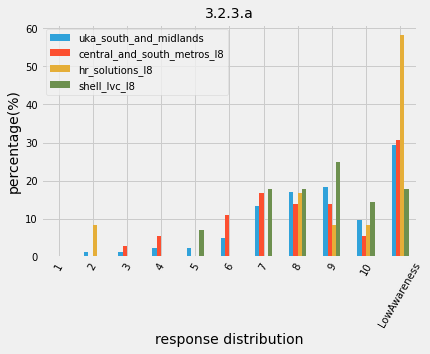

<Figure size 720x432 with 0 Axes>

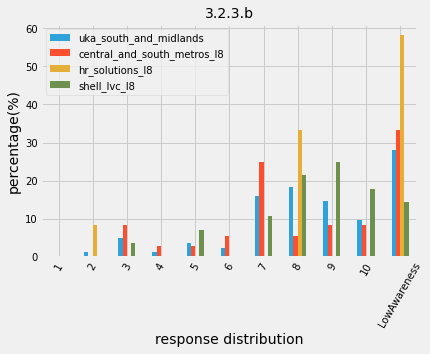

<Figure size 720x432 with 0 Axes>

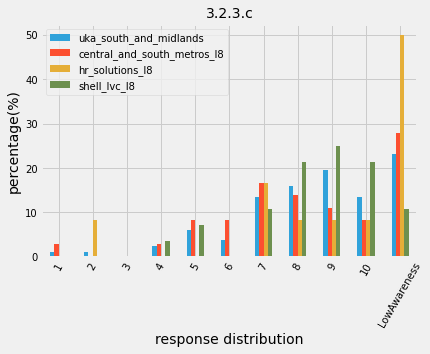

<Figure size 720x432 with 0 Axes>

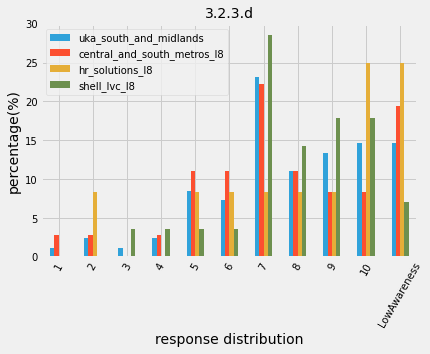

<Figure size 720x432 with 0 Axes>

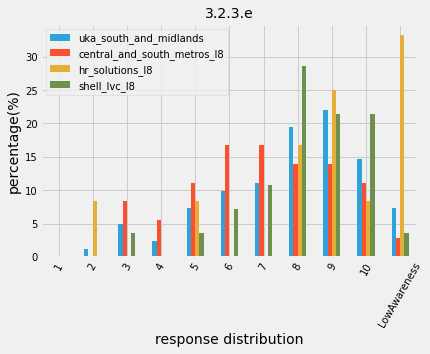

<Figure size 720x432 with 0 Axes>

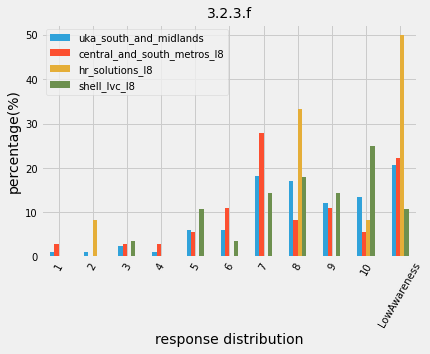

<Figure size 720x432 with 0 Axes>

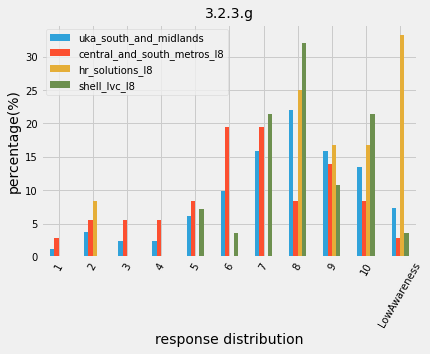

<Figure size 720x432 with 0 Axes>

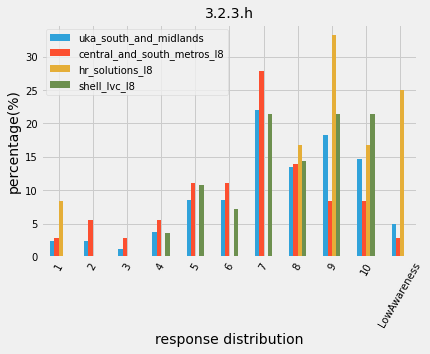

<Figure size 720x432 with 0 Axes>

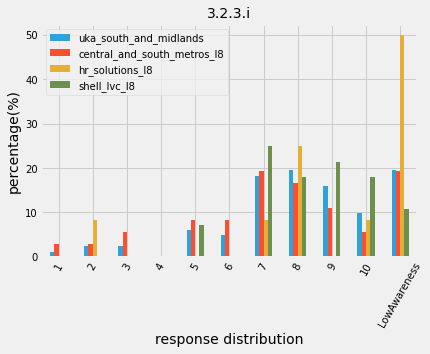

<Figure size 720x432 with 0 Axes>

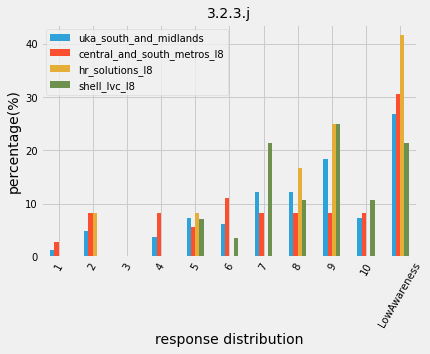

<Figure size 720x432 with 0 Axes>

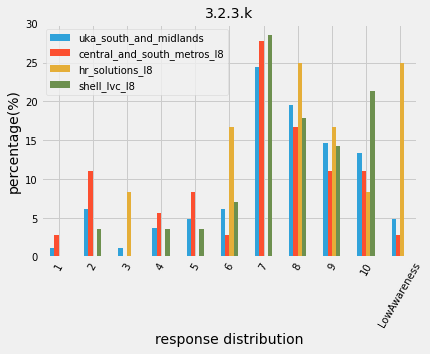

<Figure size 720x432 with 0 Axes>

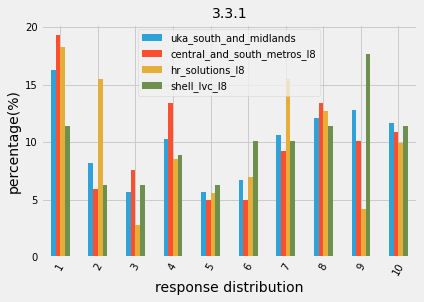

<Figure size 720x432 with 0 Axes>

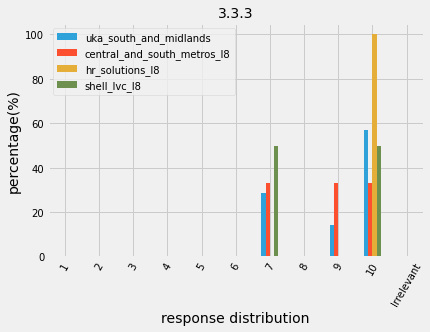

<Figure size 720x432 with 0 Axes>

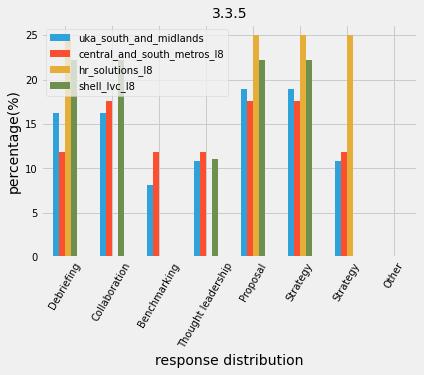

<Figure size 720x432 with 0 Axes>

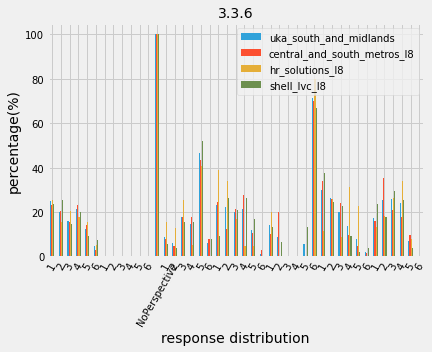

<Figure size 720x432 with 0 Axes>

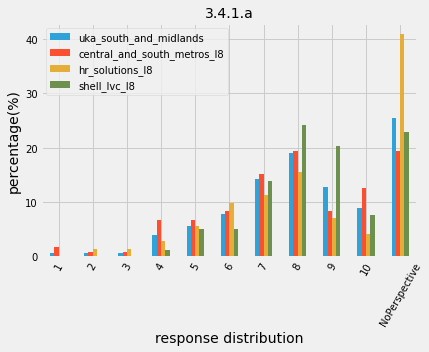

<Figure size 720x432 with 0 Axes>

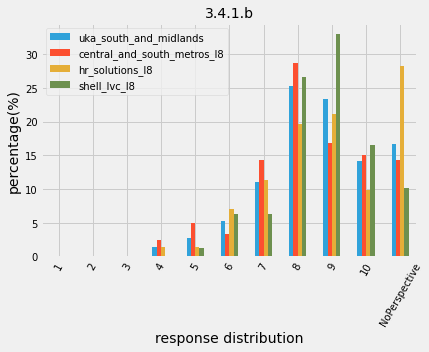

<Figure size 720x432 with 0 Axes>

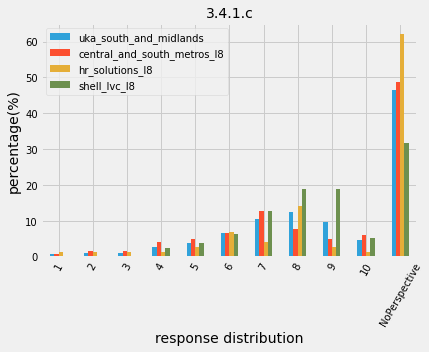

<Figure size 720x432 with 0 Axes>

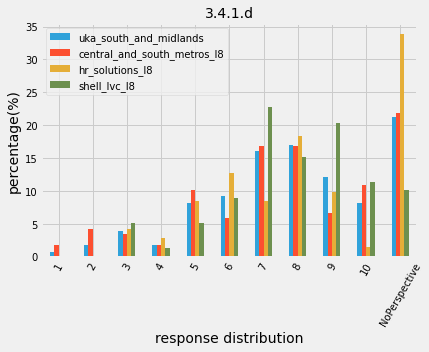

<Figure size 720x432 with 0 Axes>

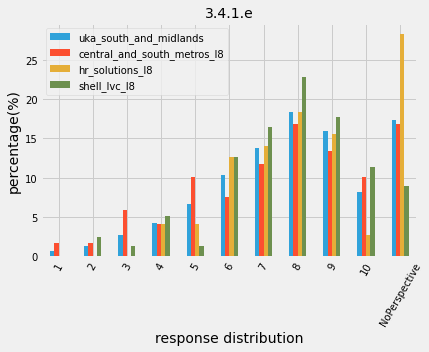

<Figure size 720x432 with 0 Axes>

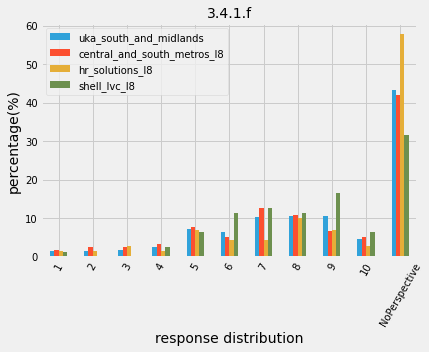

<Figure size 720x432 with 0 Axes>

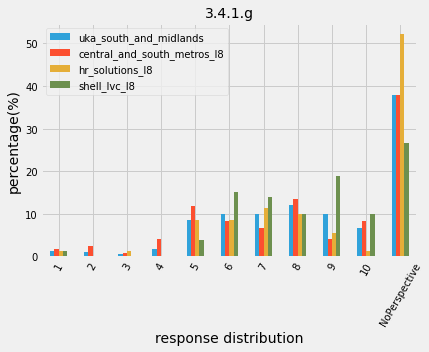

<Figure size 720x432 with 0 Axes>

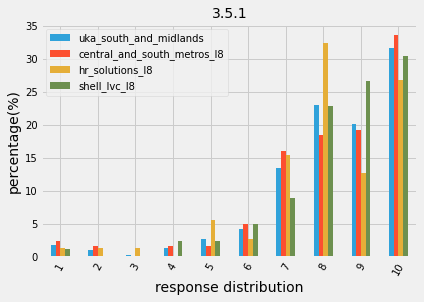

<Figure size 720x432 with 0 Axes>

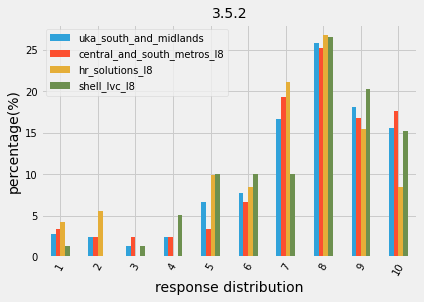

<Figure size 720x432 with 0 Axes>

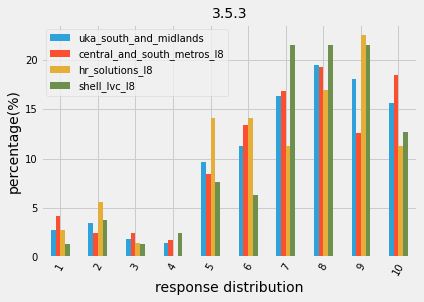

<Figure size 720x432 with 0 Axes>

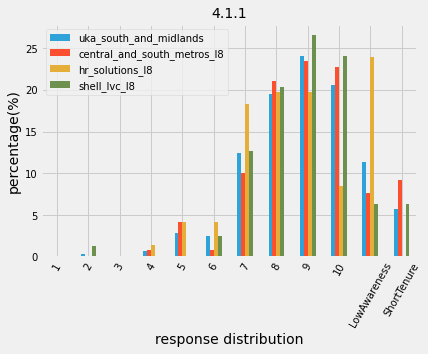

<Figure size 720x432 with 0 Axes>

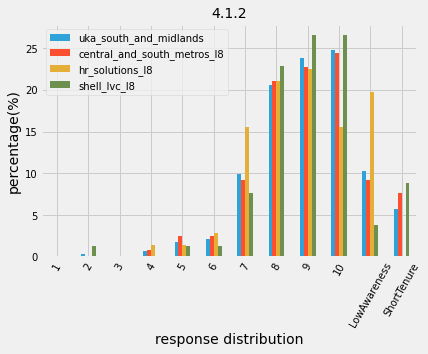

<Figure size 720x432 with 0 Axes>

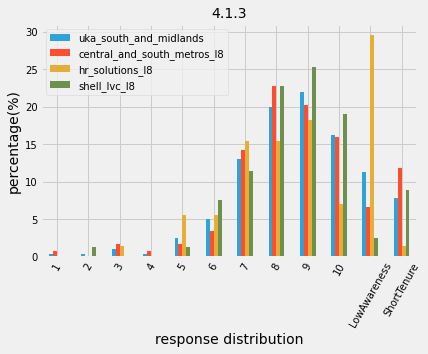

<Figure size 720x432 with 0 Axes>

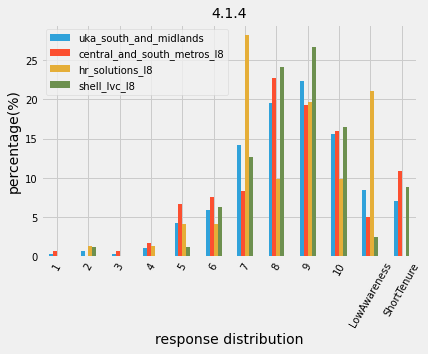

<Figure size 720x432 with 0 Axes>

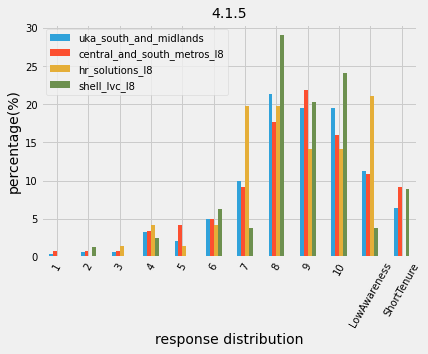

<Figure size 720x432 with 0 Axes>

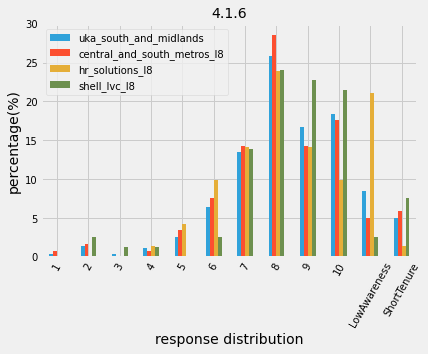

<Figure size 720x432 with 0 Axes>

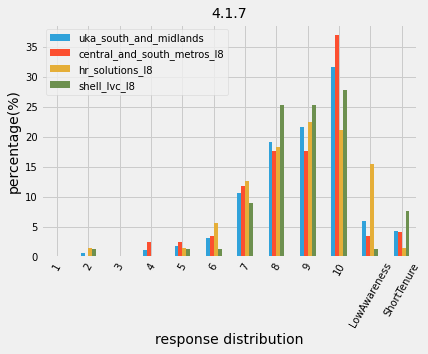

<Figure size 720x432 with 0 Axes>

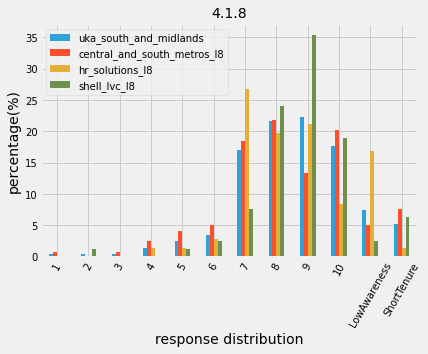

<Figure size 720x432 with 0 Axes>

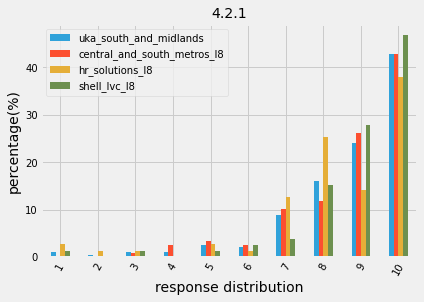

<Figure size 720x432 with 0 Axes>

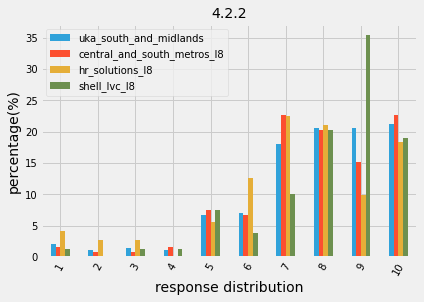

<Figure size 720x432 with 0 Axes>

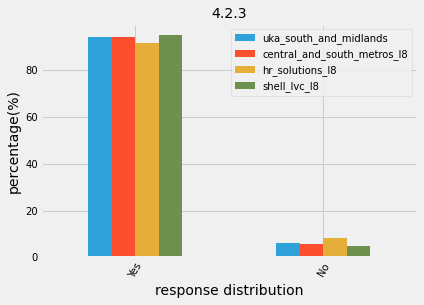

<Figure size 720x432 with 0 Axes>

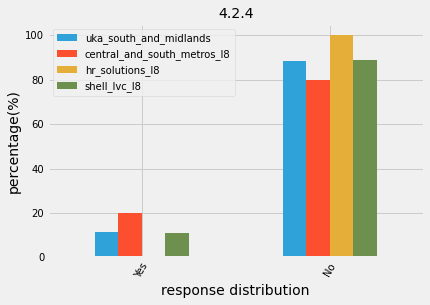

<Figure size 720x432 with 0 Axes>

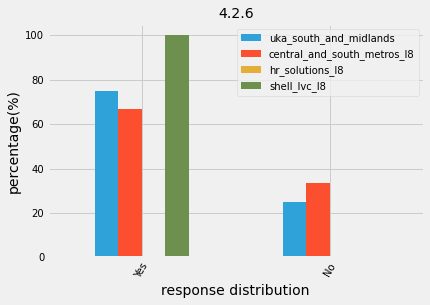

<Figure size 720x432 with 0 Axes>

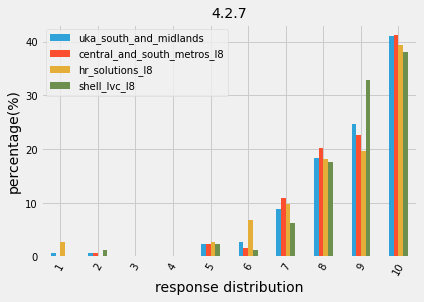

<Figure size 720x432 with 0 Axes>

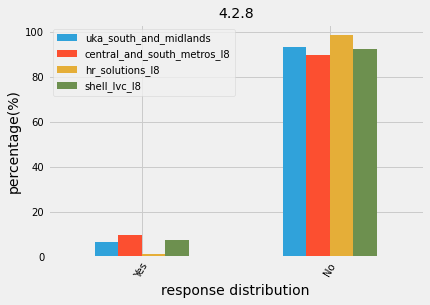

<Figure size 720x432 with 0 Axes>

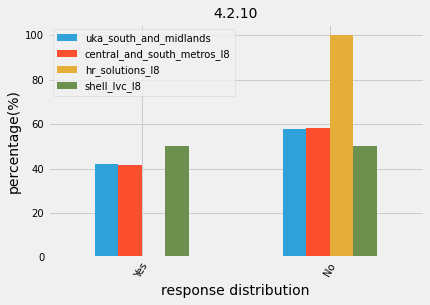

<Figure size 720x432 with 0 Axes>

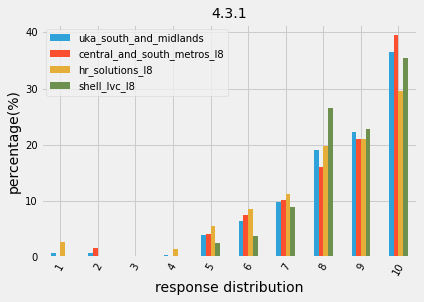

<Figure size 720x432 with 0 Axes>

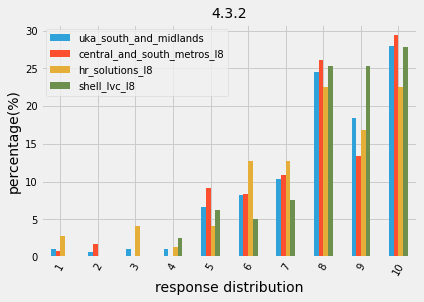

<Figure size 720x432 with 0 Axes>

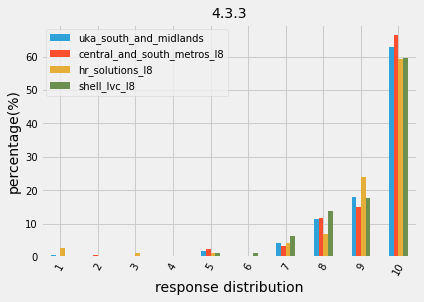

<Figure size 720x432 with 0 Axes>

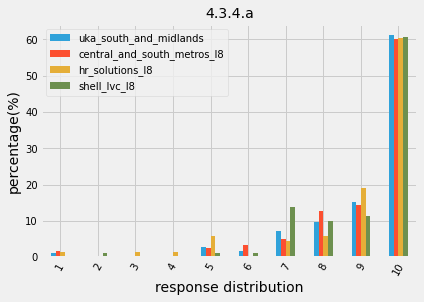

<Figure size 720x432 with 0 Axes>

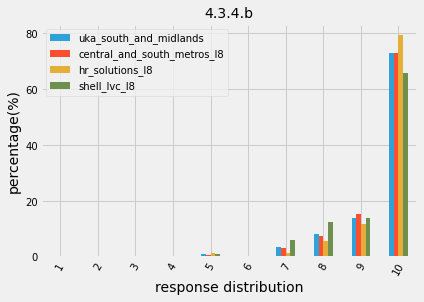

<Figure size 720x432 with 0 Axes>

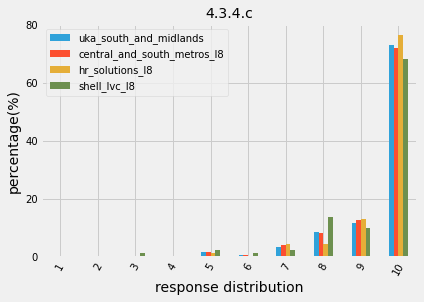

<Figure size 720x432 with 0 Axes>

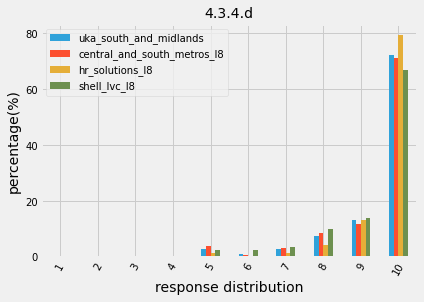

<Figure size 720x432 with 0 Axes>

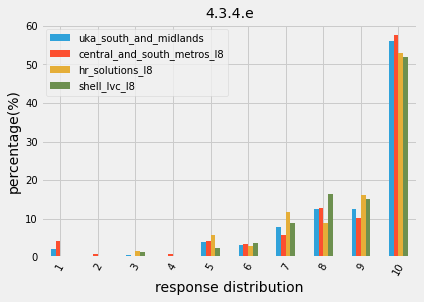

<Figure size 720x432 with 0 Axes>

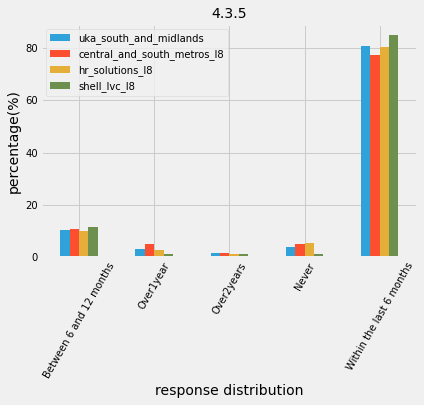

<Figure size 720x432 with 0 Axes>

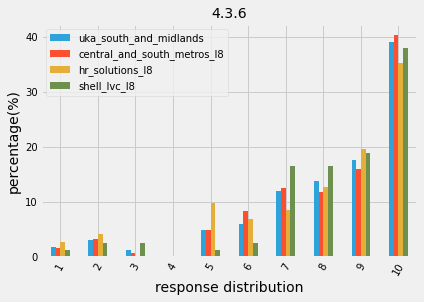

<Figure size 720x432 with 0 Axes>

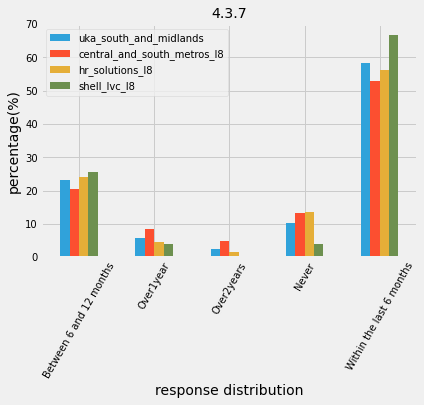

<Figure size 720x432 with 0 Axes>

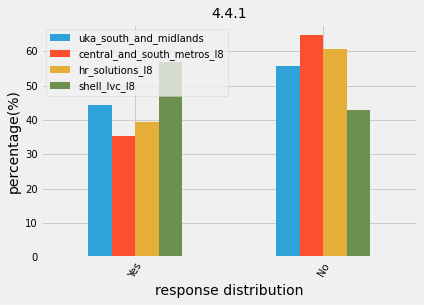

<Figure size 720x432 with 0 Axes>

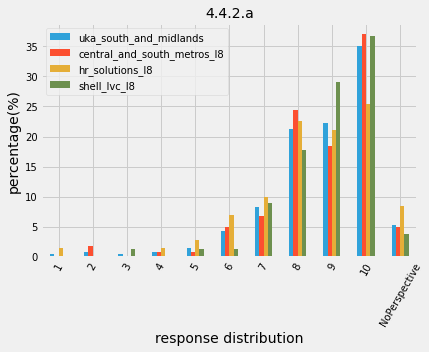

<Figure size 720x432 with 0 Axes>

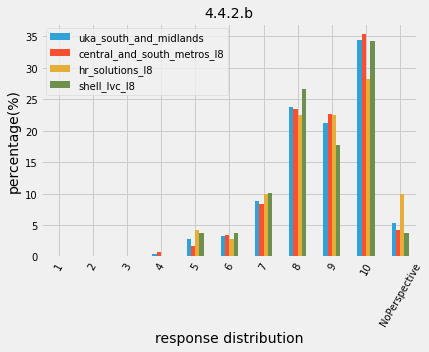

<Figure size 720x432 with 0 Axes>

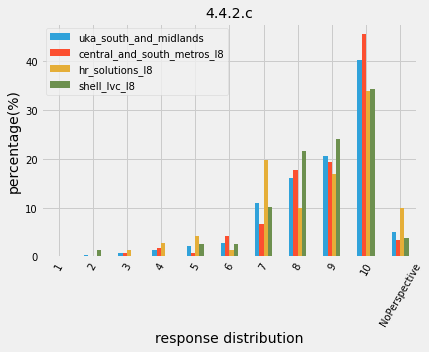

<Figure size 720x432 with 0 Axes>

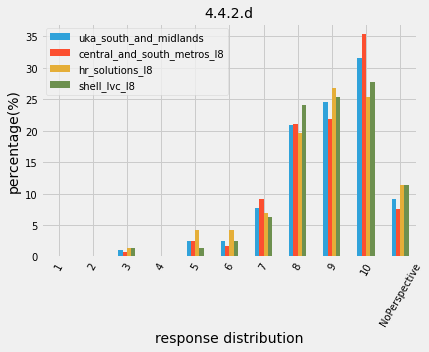

<Figure size 720x432 with 0 Axes>

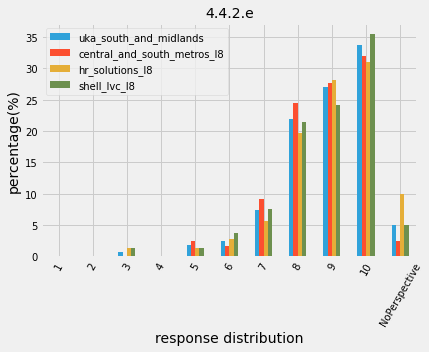

<Figure size 720x432 with 0 Axes>

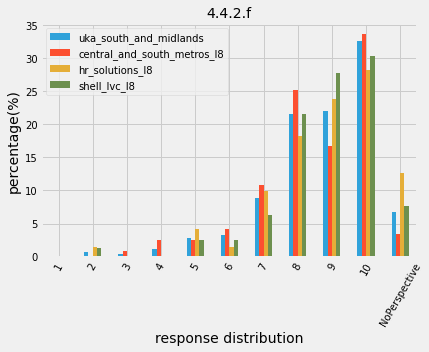

<Figure size 720x432 with 0 Axes>

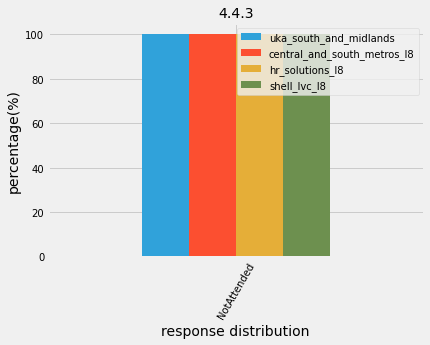

<Figure size 720x432 with 0 Axes>

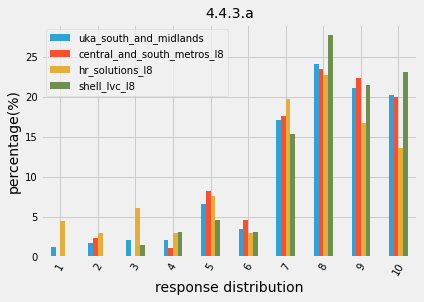

<Figure size 720x432 with 0 Axes>

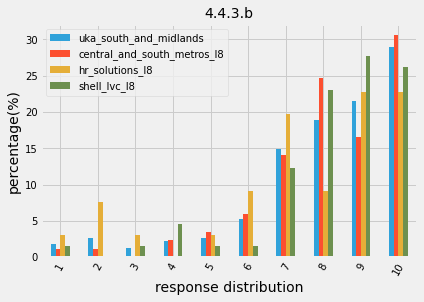

<Figure size 720x432 with 0 Axes>

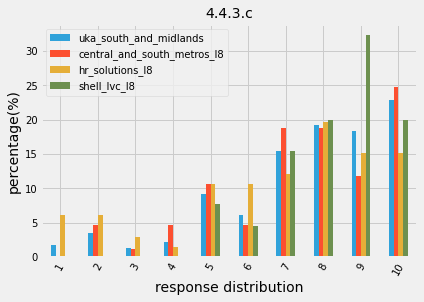

<Figure size 720x432 with 0 Axes>

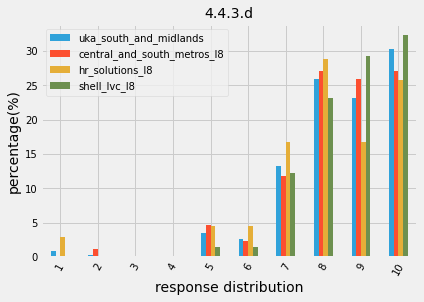

<Figure size 720x432 with 0 Axes>

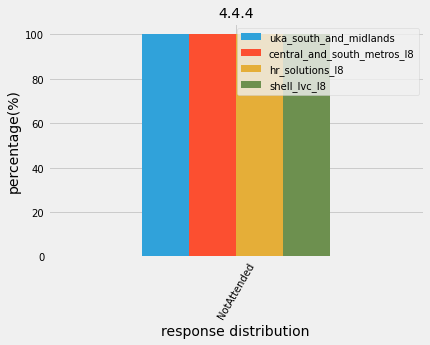

<Figure size 720x432 with 0 Axes>

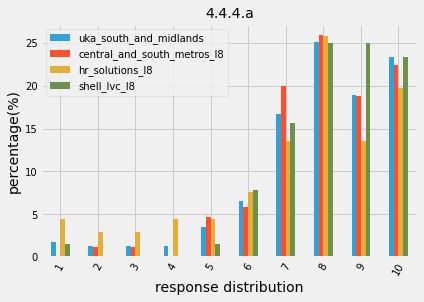

<Figure size 720x432 with 0 Axes>

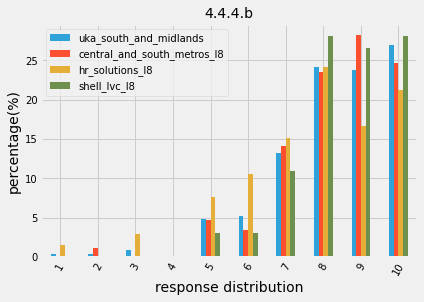

<Figure size 720x432 with 0 Axes>

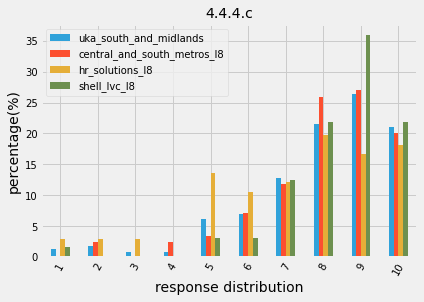

<Figure size 720x432 with 0 Axes>

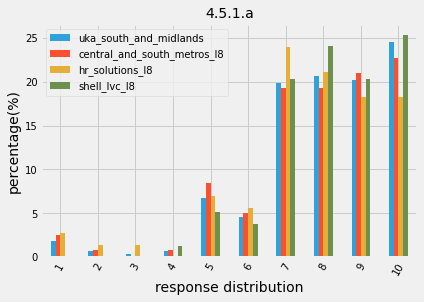

<Figure size 720x432 with 0 Axes>

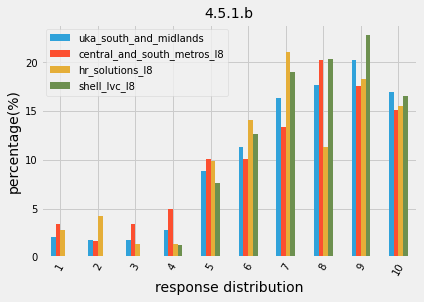

<Figure size 720x432 with 0 Axes>

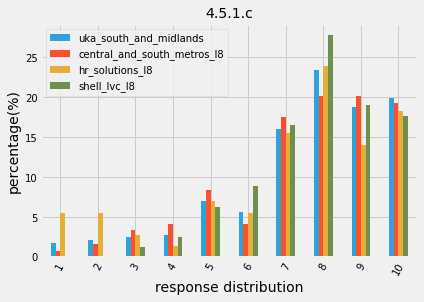

<Figure size 720x432 with 0 Axes>

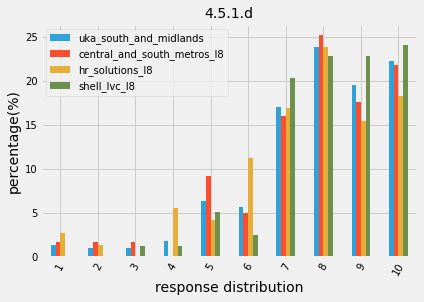

<Figure size 720x432 with 0 Axes>

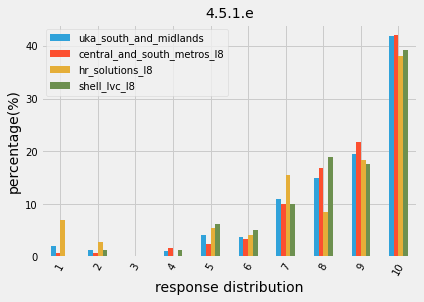

<Figure size 720x432 with 0 Axes>

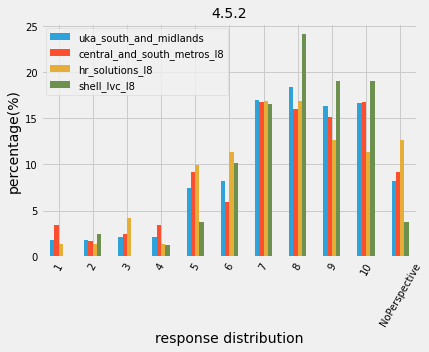

<Figure size 720x432 with 0 Axes>

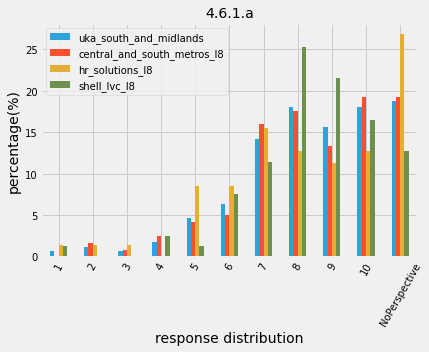

<Figure size 720x432 with 0 Axes>

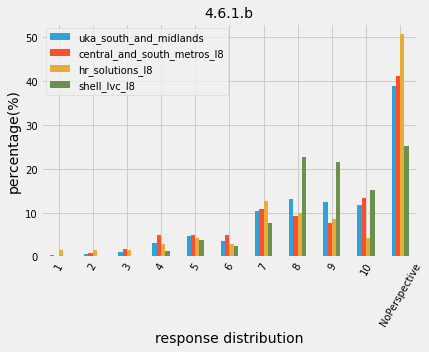

<Figure size 720x432 with 0 Axes>

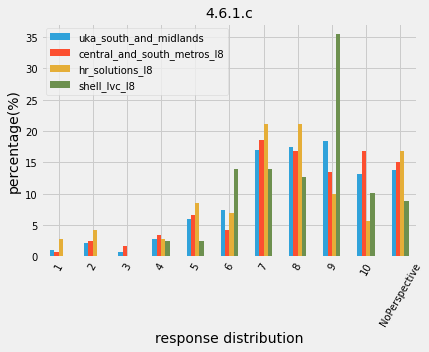

<Figure size 720x432 with 0 Axes>

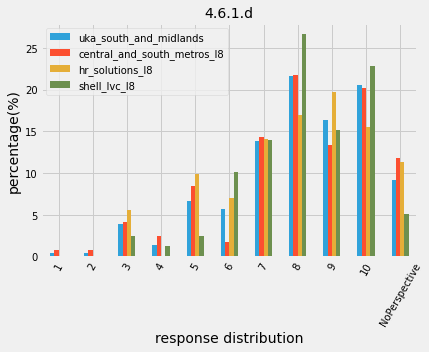

<Figure size 720x432 with 0 Axes>

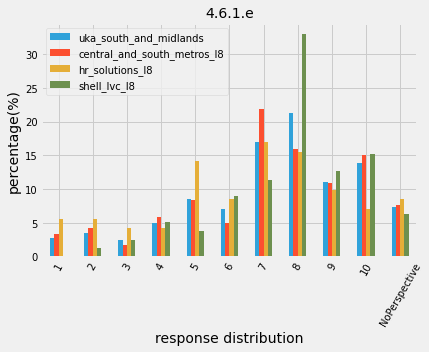

<Figure size 720x432 with 0 Axes>

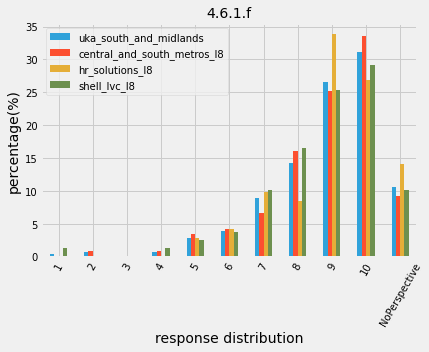

<Figure size 720x432 with 0 Axes>

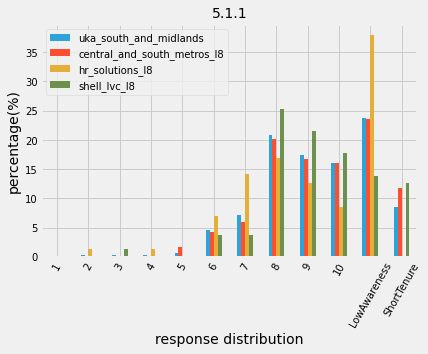

<Figure size 720x432 with 0 Axes>

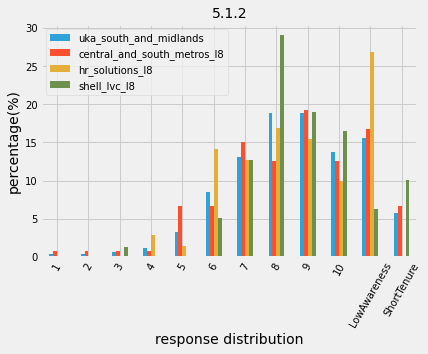

<Figure size 720x432 with 0 Axes>

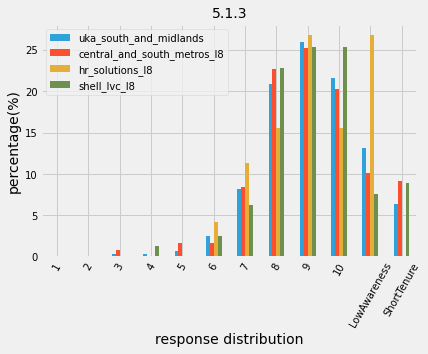

<Figure size 720x432 with 0 Axes>

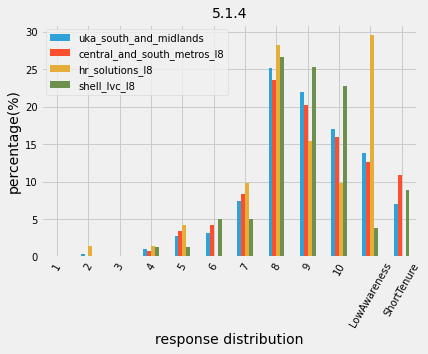

<Figure size 720x432 with 0 Axes>

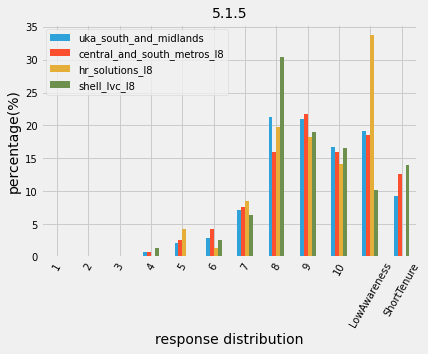

<Figure size 720x432 with 0 Axes>

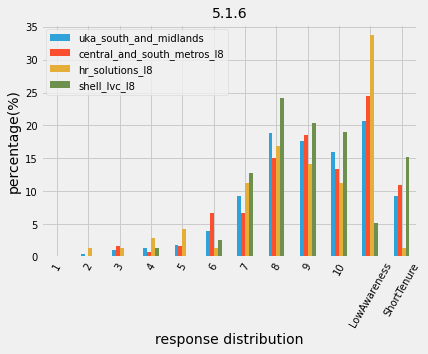

<Figure size 720x432 with 0 Axes>

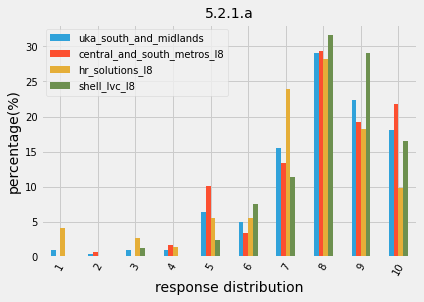

<Figure size 720x432 with 0 Axes>

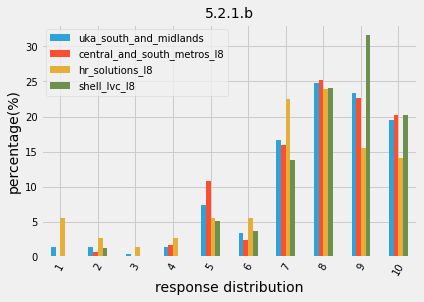

<Figure size 720x432 with 0 Axes>

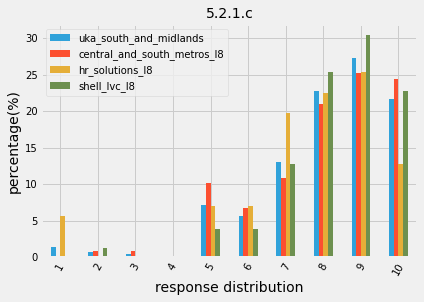

<Figure size 720x432 with 0 Axes>

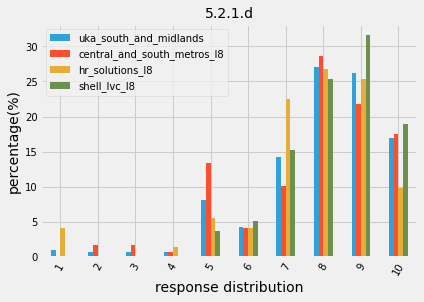

<Figure size 720x432 with 0 Axes>

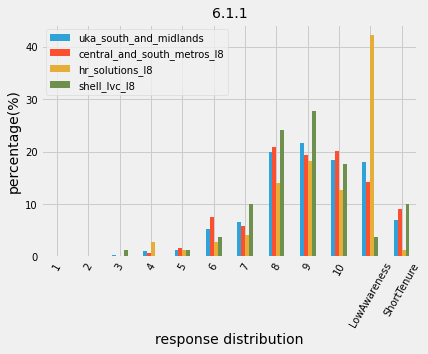

<Figure size 720x432 with 0 Axes>

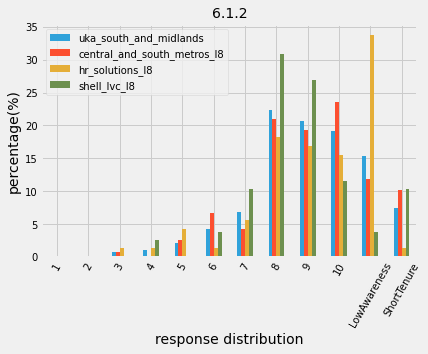

<Figure size 720x432 with 0 Axes>

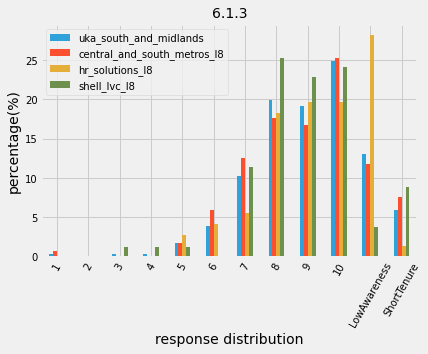

<Figure size 720x432 with 0 Axes>

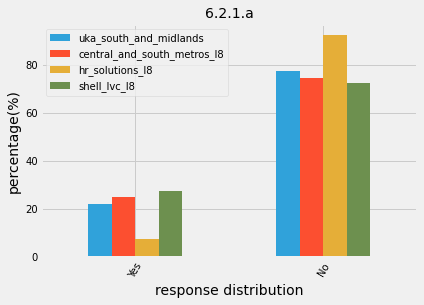

<Figure size 720x432 with 0 Axes>

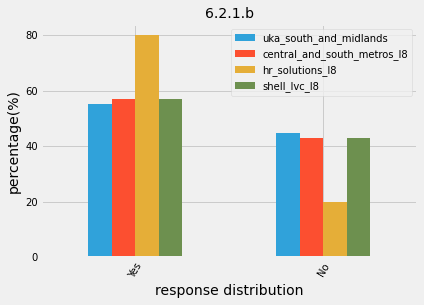

<Figure size 720x432 with 0 Axes>

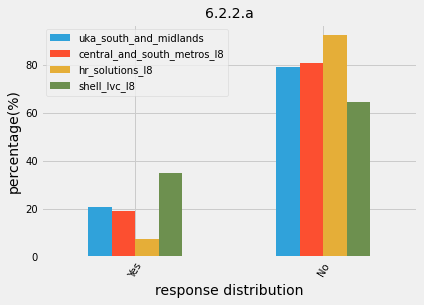

<Figure size 720x432 with 0 Axes>

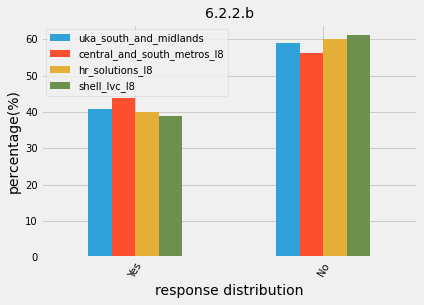

<Figure size 720x432 with 0 Axes>

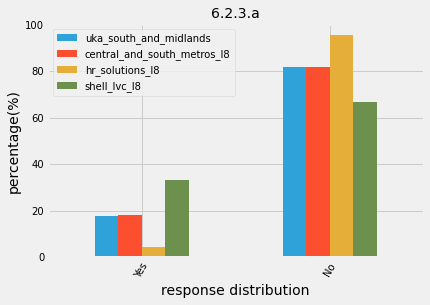

<Figure size 720x432 with 0 Axes>

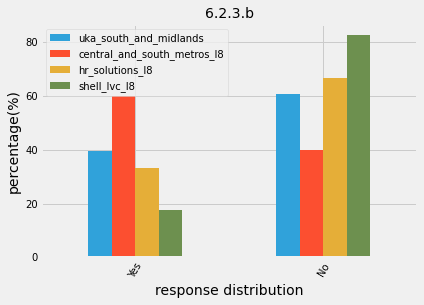

<Figure size 720x432 with 0 Axes>

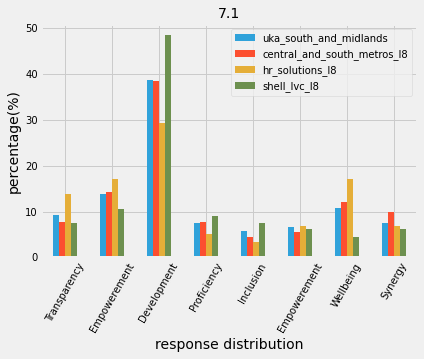

<Figure size 720x432 with 0 Axes>

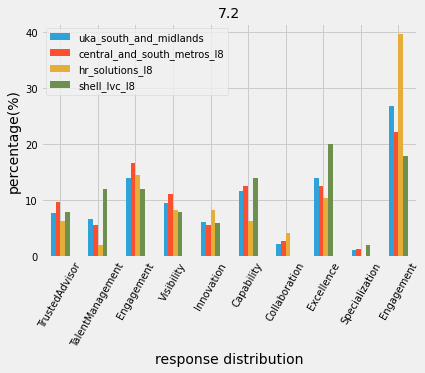

<Figure size 720x432 with 0 Axes>

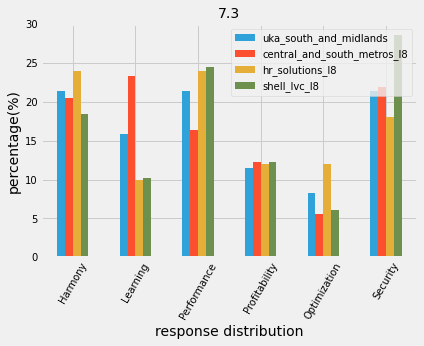

<Figure size 720x432 with 0 Axes>

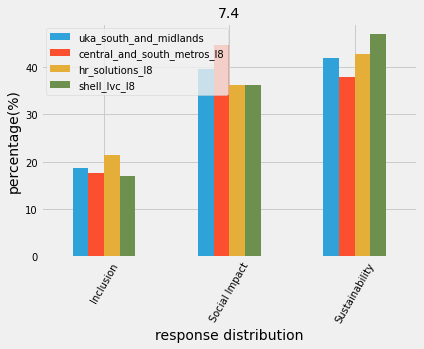

<Figure size 720x432 with 0 Axes>

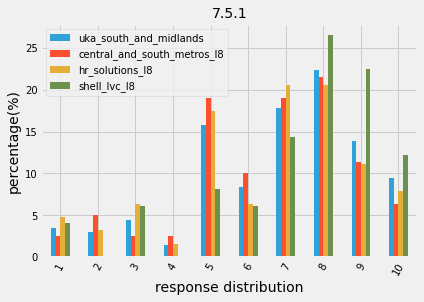

In [44]:
for i in range(len(sec_master_df)):
    plot_barcharts(sec_master_df[i])

In [45]:
df_sum=clean_summary(df_summary)

Text(0.5, 1.0, '2023 vs 2022 Survey Respondent Comparion(log)')

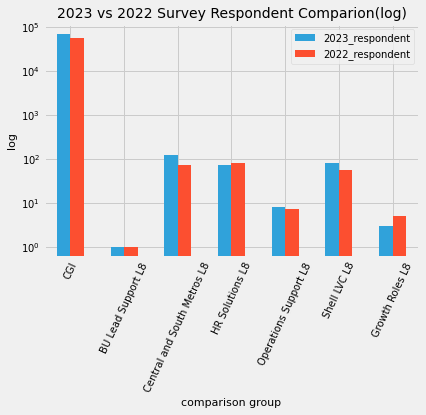

In [496]:
g=df_sum.plot(x='comparison_group',y=['2023_respondent','2022_respondent'],kind='bar',fontsize=10)
g.set_yscale('log')
plt.xticks(rotation=65)
g.set_xlabel('comparison group',fontsize=11)
g.set_ylabel('log',fontsize=11)
plt.legend(fontsize=10)
g.set_title('2023 vs 2022 Survey Respondent Comparion(log)',fontsize=14)